In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask
from scipy import stats
from rasterio.windows import from_bounds
from matplotlib.colors import ListedColormap

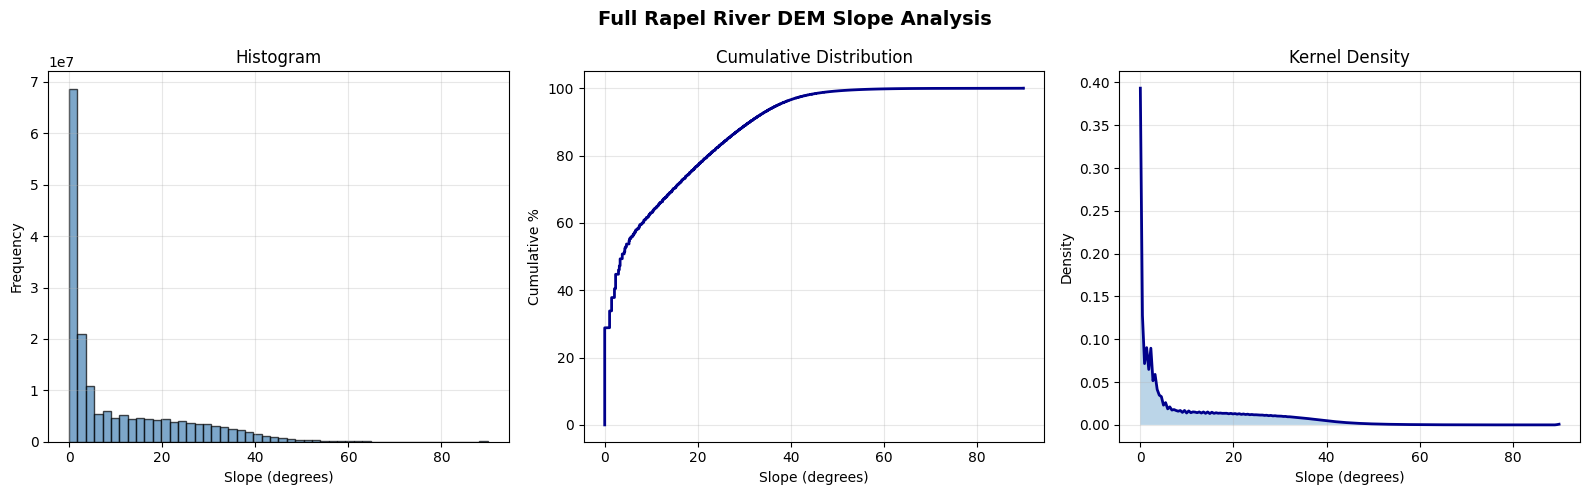


Full DEM Statistics:
Mean: 10.57° | Median: 3.77° | Max: 89.96°


In [2]:
# Open the full DEM
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    elevation = dem.read(1)
    transform = dem.transform

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))
slope_clean = slope_degrees[~np.isnan(slope_degrees)].flatten()

# Create three plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Histogram
ax1.hist(slope_clean, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Slope (degrees)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram')
ax1.grid(True, alpha=0.3)

# Cumulative distribution
sorted_slopes = np.sort(slope_clean)
cumulative = np.arange(1, len(sorted_slopes) + 1) / len(sorted_slopes) * 100
ax2.plot(sorted_slopes, cumulative, linewidth=2, color='darkblue')
ax2.set_xlabel('Slope (degrees)')
ax2.set_ylabel('Cumulative %')
ax2.set_title('Cumulative Distribution')
ax2.grid(True, alpha=0.3)

# Kernel density
density = stats.gaussian_kde(slope_clean)
x_range = np.linspace(slope_clean.min(), slope_clean.max(), 200)
ax3.plot(x_range, density(x_range), linewidth=2, color='darkblue')
ax3.fill_between(x_range, density(x_range), alpha=0.3)
ax3.set_xlabel('Slope (degrees)')
ax3.set_ylabel('Density')
ax3.set_title('Kernel Density')
ax3.grid(True, alpha=0.3)

fig.suptitle('Full Rapel River DEM Slope Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistics
print(f"\nFull DEM Statistics:")
print(f"Mean: {np.mean(slope_clean):.2f}° | Median: {np.median(slope_clean):.2f}° | Max: {np.max(slope_clean):.2f}°")

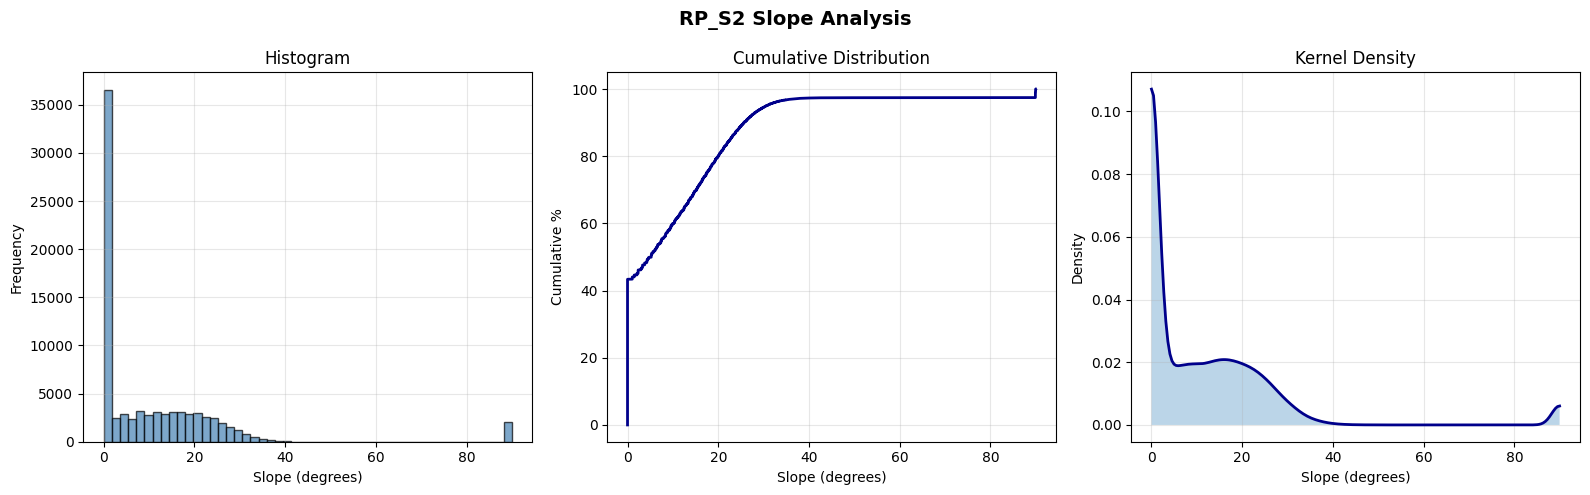


RP_S2 Statistics:
Mean: 10.75° | Median: 5.22° | Max: 89.96°


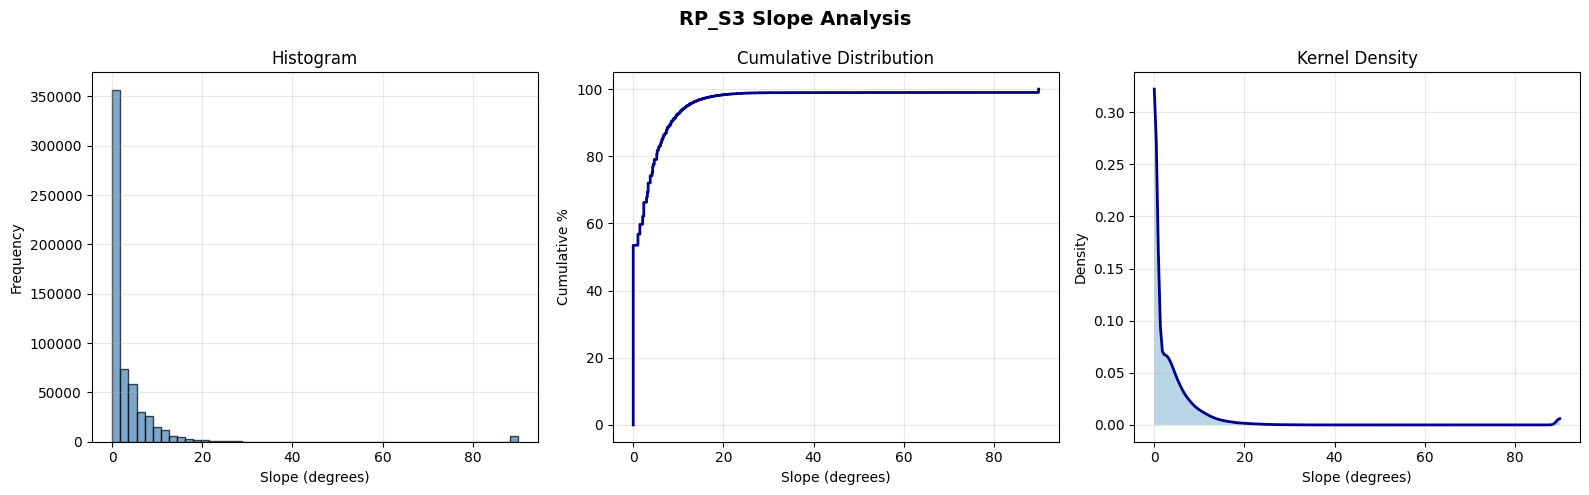


RP_S3 Statistics:
Mean: 3.48° | Median: 0.00° | Max: 89.96°


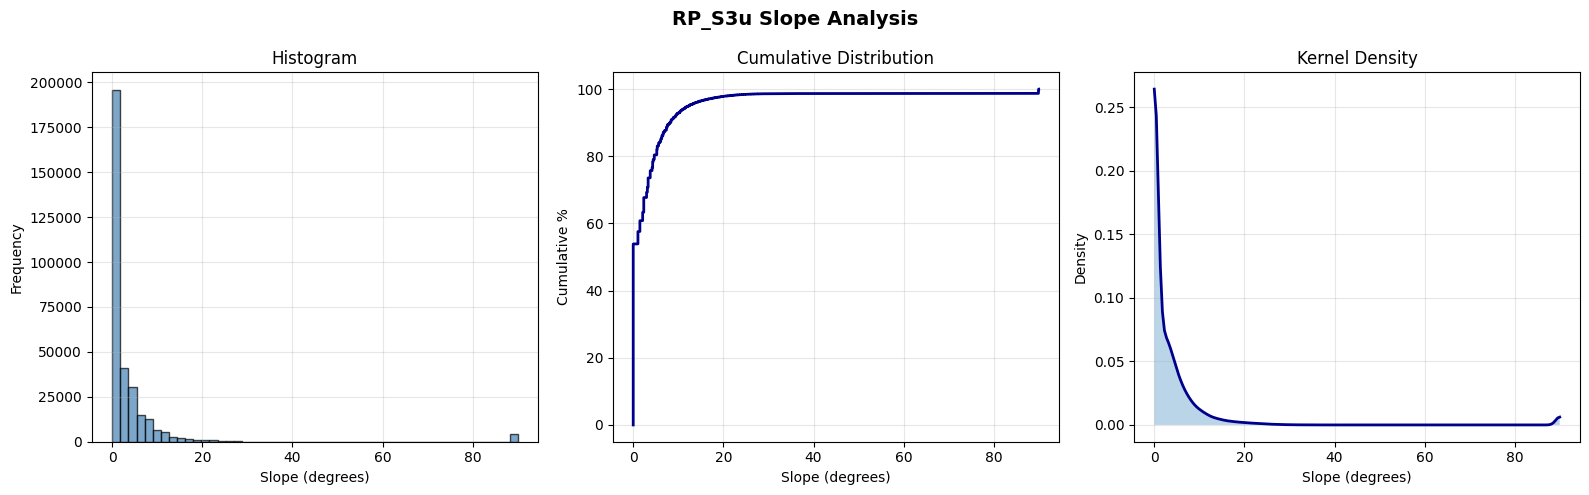


RP_S3u Statistics:
Mean: 3.64° | Median: 0.00° | Max: 89.96°


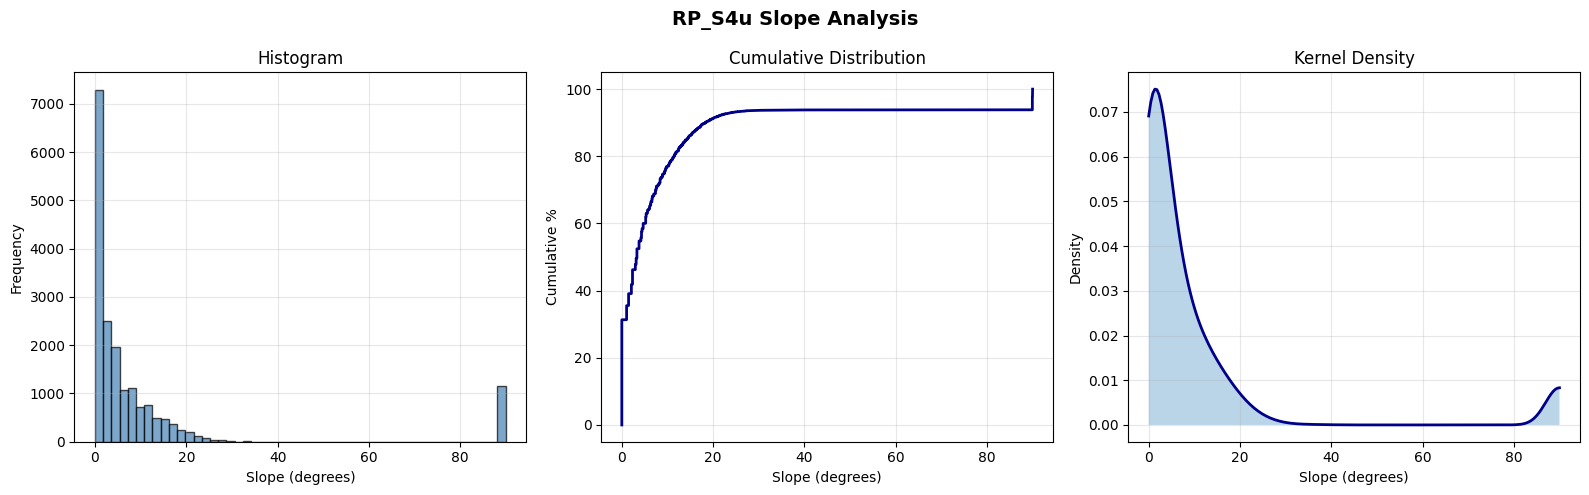


RP_S4u Statistics:
Mean: 10.16° | Median: 3.31° | Max: 89.96°


In [3]:
def analyze_slope(shapefile_path, dem_path, title):
    # Read shapefile and clip DEM
    shapefile = gpd.read_file(shapefile_path)
    with rasterio.open(dem_path) as dem:
        elevation, transform = mask(dem, shapefile.geometry, crop=True)
        elevation = elevation[0]
    
    # Calculate slope
    cell_size = transform[0]
    dy, dx = np.gradient(elevation, cell_size)
    slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))
    slope_clean = slope_degrees[~np.isnan(slope_degrees)].flatten()
    
    # Create three plots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
    
    # Histogram
    ax1.hist(slope_clean, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax1.set_xlabel('Slope (degrees)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram')
    ax1.grid(True, alpha=0.3)
    
    # Cumulative distribution
    sorted_slopes = np.sort(slope_clean)
    cumulative = np.arange(1, len(sorted_slopes) + 1) / len(sorted_slopes) * 100
    ax2.plot(sorted_slopes, cumulative, linewidth=2, color='darkblue')
    ax2.set_xlabel('Slope (degrees)')
    ax2.set_ylabel('Cumulative %')
    ax2.set_title('Cumulative Distribution')
    ax2.grid(True, alpha=0.3)
    
    # Kernel density
    density = stats.gaussian_kde(slope_clean)
    x_range = np.linspace(slope_clean.min(), slope_clean.max(), 200)
    ax3.plot(x_range, density(x_range), linewidth=2, color='darkblue')
    ax3.fill_between(x_range, density(x_range), alpha=0.3)
    ax3.set_xlabel('Slope (degrees)')
    ax3.set_ylabel('Density')
    ax3.set_title('Kernel Density')
    ax3.grid(True, alpha=0.3)
    
    fig.suptitle(f'{title} Slope Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{title} Statistics:")
    print(f"Mean: {np.mean(slope_clean):.2f}° | Median: {np.median(slope_clean):.2f}° | Max: {np.max(slope_clean):.2f}°")

# DEM path (used for all)
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'

# Run for each shapefile
analyze_slope('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp', dem_path, 'RP_S2')
analyze_slope('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp', dem_path, 'RP_S3')
analyze_slope('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp', dem_path, 'RP_S3u')
analyze_slope('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp', dem_path, 'RP_S4u')

Valid elevation range: 1m to 655m
Number of valid pixels: 2634515


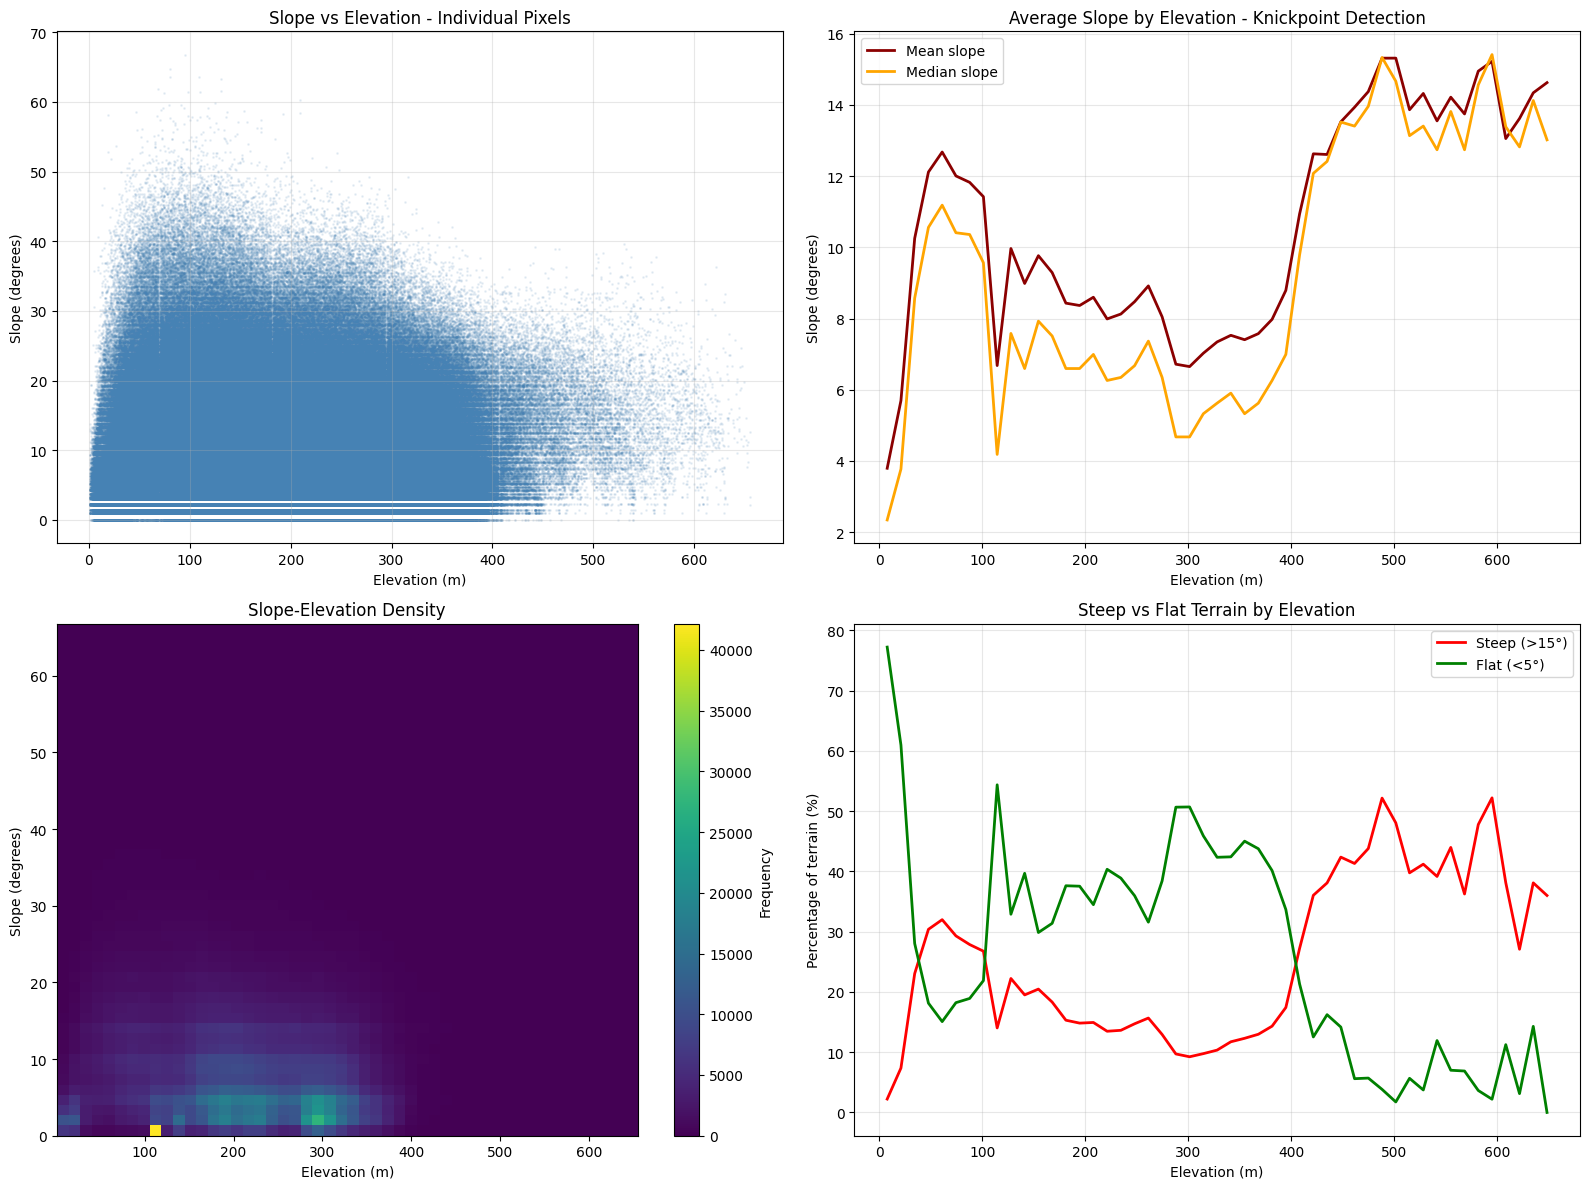


=== KNICKPOINT ANALYSIS ===
Elevation range: 1m to 655m

Look for sudden changes in the 'Mean slope by elevation' plot:
- Sharp increases = transition from flat to steep (knickpoint)
- Sharp decreases = transition from steep to flat

Potential knickpoint elevation: ~21m
(Largest change in slope gradient)


In [4]:
# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Filter out invalid values: NaN, nodata, and unrealistic elevations
valid_mask = (~np.isnan(slope_degrees) & 
              ~np.isnan(elevation) & 
              (elevation > 0) &  # Remove negative elevations
              (elevation < 10000))  # Remove unrealistic high values

if nodata is not None:
    valid_mask = valid_mask & (elevation != nodata)

slope_valid = slope_degrees[valid_mask]
elevation_valid = elevation[valid_mask]

print(f"Valid elevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
print(f"Number of valid pixels: {len(elevation_valid)}")

# Create elevation bins to analyze slope distribution by elevation
elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 50)
bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
mean_slopes = []
median_slopes = []

# Calculate mean and median slope for each elevation bin
for i in range(len(elevation_bins) - 1):
    mask = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
    if np.sum(mask) > 0:
        mean_slopes.append(np.mean(slope_valid[mask]))
        median_slopes.append(np.median(slope_valid[mask]))
    else:
        mean_slopes.append(np.nan)
        median_slopes.append(np.nan)

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Slope vs Elevation scatter plot
ax1.scatter(elevation_valid, slope_valid, alpha=0.1, s=1, c='steelblue')
ax1.set_xlabel('Elevation (m)')
ax1.set_ylabel('Slope (degrees)')
ax1.set_title('Slope vs Elevation - Individual Pixels')
ax1.grid(True, alpha=0.3)

# 2. Mean slope by elevation (knickpoint detector)
ax2.plot(bin_centers, mean_slopes, linewidth=2, color='darkred', label='Mean slope')
ax2.plot(bin_centers, median_slopes, linewidth=2, color='orange', label='Median slope')
ax2.set_xlabel('Elevation (m)')
ax2.set_ylabel('Slope (degrees)')
ax2.set_title('Average Slope by Elevation - Knickpoint Detection')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Histogram of slopes (colored by elevation)
ax3.hist2d(elevation_valid, slope_valid, bins=50, cmap='viridis')
ax3.set_xlabel('Elevation (m)')
ax3.set_ylabel('Slope (degrees)')
ax3.set_title('Slope-Elevation Density')
plt.colorbar(ax3.collections[0], ax=ax3, label='Frequency')

# 4. Identify steep vs flat terrain by elevation threshold
steep_threshold = 15  # degrees
flat_threshold = 5    # degrees

steep_terrain = slope_valid > steep_threshold
flat_terrain = slope_valid < flat_threshold

# Calculate what % of terrain is steep/flat at each elevation
pct_steep = []
pct_flat = []
for i in range(len(elevation_bins) - 1):
    mask = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
    if np.sum(mask) > 0:
        pct_steep.append(np.sum(steep_terrain[mask]) / np.sum(mask) * 100)
        pct_flat.append(np.sum(flat_terrain[mask]) / np.sum(mask) * 100)
    else:
        pct_steep.append(0)
        pct_flat.append(0)

ax4.plot(bin_centers, pct_steep, linewidth=2, color='red', label=f'Steep (>{steep_threshold}°)')
ax4.plot(bin_centers, pct_flat, linewidth=2, color='green', label=f'Flat (<{flat_threshold}°)')
ax4.set_xlabel('Elevation (m)')
ax4.set_ylabel('Percentage of terrain (%)')
ax4.set_title('Steep vs Flat Terrain by Elevation')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print knickpoint analysis
print("\n=== KNICKPOINT ANALYSIS ===")
print(f"Elevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
print(f"\nLook for sudden changes in the 'Mean slope by elevation' plot:")
print("- Sharp increases = transition from flat to steep (knickpoint)")
print("- Sharp decreases = transition from steep to flat")

# Find elevation where slope changes most dramatically
slope_gradient = np.gradient(mean_slopes)
max_change_idx = np.nanargmax(np.abs(slope_gradient))
knickpoint_elevation = bin_centers[max_change_idx]
print(f"\nPotential knickpoint elevation: ~{knickpoint_elevation:.0f}m")
print(f"(Largest change in slope gradient)")

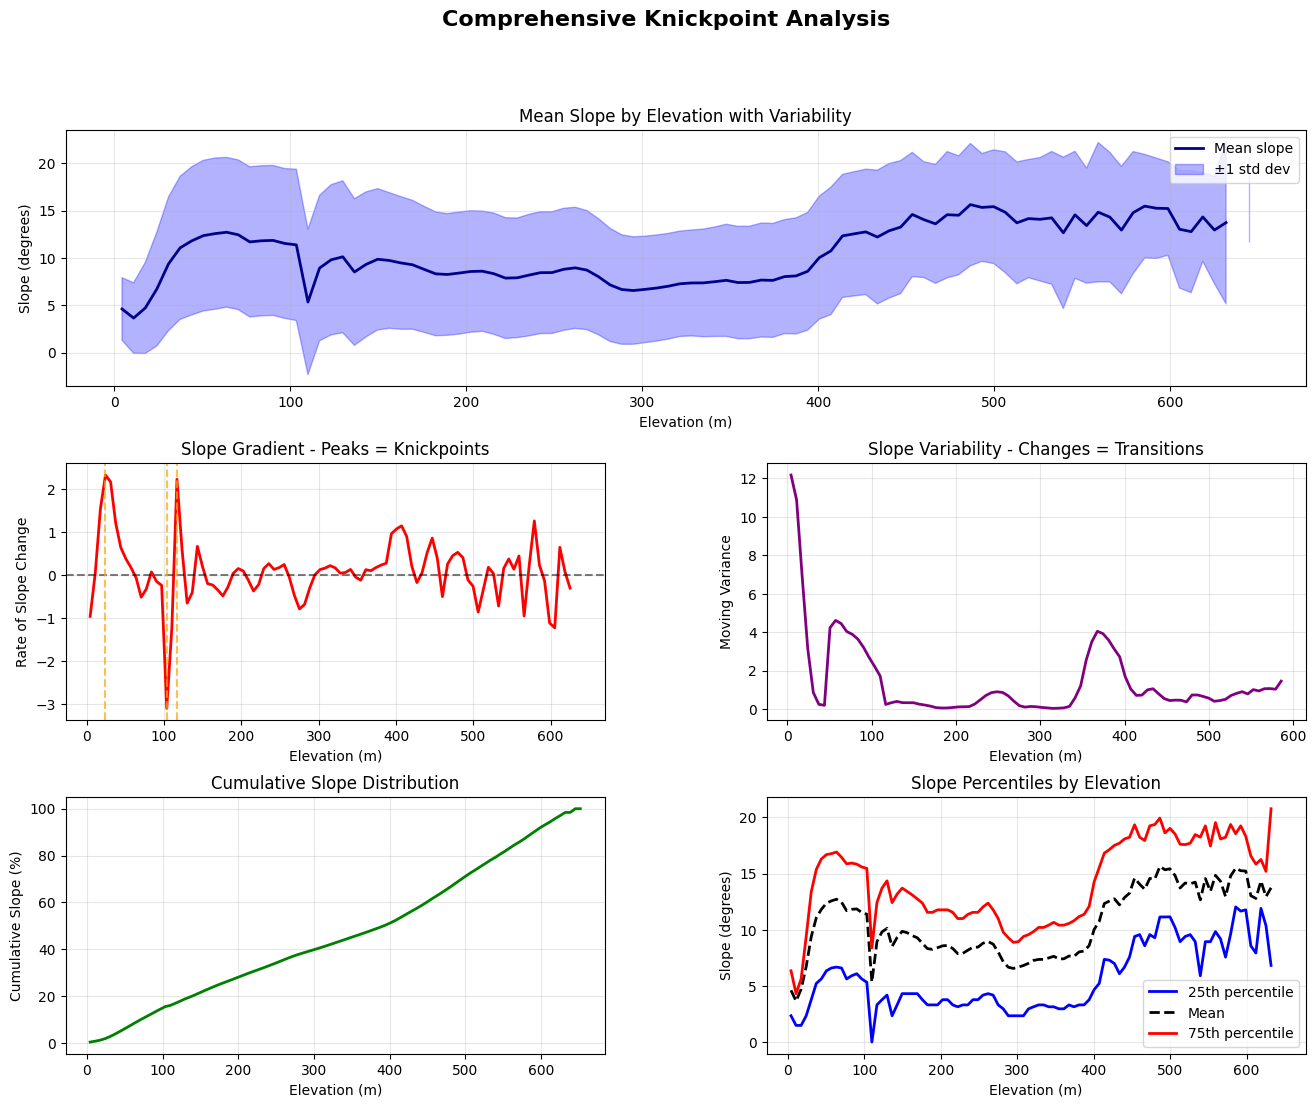


=== KNICKPOINT CANDIDATES ===
Based on rate of change analysis (largest jumps):

1. Elevation: 103m | Change: -3.096°/m | Direction: steep→flat
2. Elevation: 24m | Change: 2.332°/m | Direction: flat→steep
3. Elevation: 117m | Change: 2.233°/m | Direction: flat→steep
4. Elevation: 31m | Change: 2.174°/m | Direction: flat→steep
5. Elevation: 18m | Change: 1.537°/m | Direction: flat→steep

Elevation range analyzed: 1m to 655m


In [5]:
# Slope area analysis
# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Filter valid values
valid_mask = (~np.isnan(slope_degrees) & 
              ~np.isnan(elevation) & 
              (elevation > 0) & 
              (elevation < 10000))
if nodata is not None:
    valid_mask = valid_mask & (elevation != nodata)

slope_valid = slope_degrees[valid_mask]
elevation_valid = elevation[valid_mask]

# Method 1: Statistical change detection
elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 100)
bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
mean_slopes = []
std_slopes = []

for i in range(len(elevation_bins) - 1):
    mask = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
    if np.sum(mask) > 10:  # Need enough data points
        mean_slopes.append(np.mean(slope_valid[mask]))
        std_slopes.append(np.std(slope_valid[mask]))
    else:
        mean_slopes.append(np.nan)
        std_slopes.append(np.nan)

mean_slopes = np.array(mean_slopes)
std_slopes = np.array(std_slopes)

# Calculate rate of change (derivative)
slope_change = np.gradient(mean_slopes)

# Method 2: Moving window variance (detects where variability changes)
window_size = 10
moving_variance = []
for i in range(len(mean_slopes) - window_size):
    moving_variance.append(np.nanvar(mean_slopes[i:i+window_size]))

# Create comprehensive analysis
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Mean slope by elevation with confidence bands
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(bin_centers, mean_slopes, linewidth=2, color='darkblue', label='Mean slope')
ax1.fill_between(bin_centers, 
                  mean_slopes - std_slopes, 
                  mean_slopes + std_slopes, 
                  alpha=0.3, color='blue', label='±1 std dev')
ax1.set_xlabel('Elevation (m)')
ax1.set_ylabel('Slope (degrees)')
ax1.set_title('Mean Slope by Elevation with Variability')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rate of change (derivative) - spikes indicate knickpoints
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(bin_centers, slope_change, linewidth=2, color='red')
ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
ax2.set_xlabel('Elevation (m)')
ax2.set_ylabel('Rate of Slope Change')
ax2.set_title('Slope Gradient - Peaks = Knickpoints')
ax2.grid(True, alpha=0.3)

# Identify top 3 knickpoint candidates
valid_indices = ~np.isnan(slope_change)
if np.sum(valid_indices) > 0:
    abs_changes = np.abs(slope_change[valid_indices])
    top_3_indices = np.argsort(abs_changes)[-3:]
    valid_bin_centers = bin_centers[valid_indices]
    for idx in top_3_indices:
        ax2.axvline(valid_bin_centers[idx], color='orange', linestyle='--', alpha=0.7)

# Plot 3: Moving variance - changes indicate regime shifts
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(bin_centers[:len(moving_variance)], moving_variance, linewidth=2, color='purple')
ax3.set_xlabel('Elevation (m)')
ax3.set_ylabel('Moving Variance')
ax3.set_title('Slope Variability - Changes = Transitions')
ax3.grid(True, alpha=0.3)

# Plot 4: Cumulative slope distribution by elevation
ax4 = fig.add_subplot(gs[2, 0])
cumsum_slopes = np.nancumsum(mean_slopes)
cumsum_slopes = cumsum_slopes / cumsum_slopes[-1] * 100  # Normalize to percentage
ax4.plot(bin_centers, cumsum_slopes, linewidth=2, color='green')
ax4.set_xlabel('Elevation (m)')
ax4.set_ylabel('Cumulative Slope (%)')
ax4.set_title('Cumulative Slope Distribution')
ax4.grid(True, alpha=0.3)

# Plot 5: Percentile analysis
ax5 = fig.add_subplot(gs[2, 1])
p25_slopes = []
p75_slopes = []
for i in range(len(elevation_bins) - 1):
    mask = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
    if np.sum(mask) > 10:
        p25_slopes.append(np.percentile(slope_valid[mask], 25))
        p75_slopes.append(np.percentile(slope_valid[mask], 75))
    else:
        p25_slopes.append(np.nan)
        p75_slopes.append(np.nan)

ax5.plot(bin_centers, p25_slopes, linewidth=2, color='blue', label='25th percentile')
ax5.plot(bin_centers, mean_slopes, linewidth=2, color='black', label='Mean', linestyle='--')
ax5.plot(bin_centers, p75_slopes, linewidth=2, color='red', label='75th percentile')
ax5.set_xlabel('Elevation (m)')
ax5.set_ylabel('Slope (degrees)')
ax5.set_title('Slope Percentiles by Elevation')
ax5.legend()
ax5.grid(True, alpha=0.3)

plt.suptitle('Comprehensive Knickpoint Analysis', fontsize=16, fontweight='bold')
plt.show()

# Statistical summary
print("\n=== KNICKPOINT CANDIDATES ===")
print("Based on rate of change analysis (largest jumps):\n")

valid_indices = ~np.isnan(slope_change)
if np.sum(valid_indices) > 0:
    abs_changes = np.abs(slope_change[valid_indices])
    top_5_indices = np.argsort(abs_changes)[-5:][::-1]
    valid_bin_centers = bin_centers[valid_indices]
    valid_slope_change = slope_change[valid_indices]
    
    for i, idx in enumerate(top_5_indices, 1):
        elev = valid_bin_centers[idx]
        change = valid_slope_change[idx]
        direction = "steep→flat" if change < 0 else "flat→steep"
        print(f"{i}. Elevation: {elev:.0f}m | Change: {change:.3f}°/m | Direction: {direction}")

print(f"\nElevation range analyzed: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")

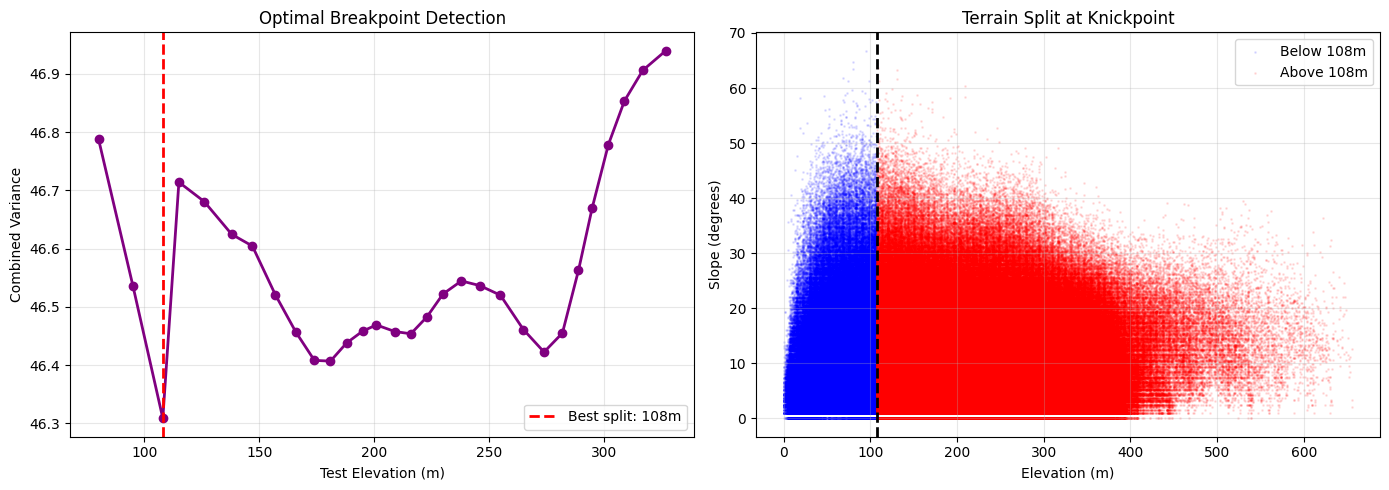


=== KNICKPOINT AT ~108m ===

BELOW knickpoint (108m):
  Mean slope: 10.37°
  Median slope: 8.57°
  Std dev: 7.90°

ABOVE knickpoint (108m):
  Mean slope: 8.12°
  Median slope: 6.35°
  Std dev: 6.59°

Difference in mean slope: 2.25°


In [6]:
# Statistical anaylsis 
# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Open DEM
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Filter valid values
valid_mask = (~np.isnan(slope_degrees) & ~np.isnan(elevation) & 
              (elevation > 0) & (elevation < 10000))
if nodata is not None:
    valid_mask = valid_mask & (elevation != nodata)

slope_valid = slope_degrees[valid_mask]
elevation_valid = elevation[valid_mask]

# Split data into elevation bins and test different breakpoints
test_elevations = np.percentile(elevation_valid, np.linspace(10, 90, 30))
variances = []

for test_elev in test_elevations:
    # Split into above and below
    below = slope_valid[elevation_valid < test_elev]
    above = slope_valid[elevation_valid >= test_elev]
    
    if len(below) > 100 and len(above) > 100:
        # Calculate combined variance (lower = better split)
        total_var = (np.var(below) * len(below) + np.var(above) * len(above)) / len(slope_valid)
        variances.append(total_var)
    else:
        variances.append(np.nan)

# Find elevation with minimum variance (best natural split)
best_idx = np.nanargmin(variances)
knickpoint_elev = test_elevations[best_idx]

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Variance by breakpoint elevation
ax1.plot(test_elevations, variances, linewidth=2, color='purple', marker='o')
ax1.axvline(knickpoint_elev, color='red', linestyle='--', linewidth=2, 
            label=f'Best split: {knickpoint_elev:.0f}m')
ax1.set_xlabel('Test Elevation (m)')
ax1.set_ylabel('Combined Variance')
ax1.set_title('Optimal Breakpoint Detection')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Show the split
ax2.scatter(elevation_valid[elevation_valid < knickpoint_elev], 
            slope_valid[elevation_valid < knickpoint_elev],
            alpha=0.1, s=1, c='blue', label=f'Below {knickpoint_elev:.0f}m')
ax2.scatter(elevation_valid[elevation_valid >= knickpoint_elev], 
            slope_valid[elevation_valid >= knickpoint_elev],
            alpha=0.1, s=1, c='red', label=f'Above {knickpoint_elev:.0f}m')
ax2.axvline(knickpoint_elev, color='black', linestyle='--', linewidth=2)
ax2.set_xlabel('Elevation (m)')
ax2.set_ylabel('Slope (degrees)')
ax2.set_title('Terrain Split at Knickpoint')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare statistics above and below
below_slopes = slope_valid[elevation_valid < knickpoint_elev]
above_slopes = slope_valid[elevation_valid >= knickpoint_elev]

print(f"\n=== KNICKPOINT AT ~{knickpoint_elev:.0f}m ===")
print(f"\nBELOW knickpoint ({knickpoint_elev:.0f}m):")
print(f"  Mean slope: {np.mean(below_slopes):.2f}°")
print(f"  Median slope: {np.median(below_slopes):.2f}°")
print(f"  Std dev: {np.std(below_slopes):.2f}°")

print(f"\nABOVE knickpoint ({knickpoint_elev:.0f}m):")
print(f"  Mean slope: {np.mean(above_slopes):.2f}°")
print(f"  Median slope: {np.median(above_slopes):.2f}°")
print(f"  Std dev: {np.std(above_slopes):.2f}°")

print(f"\nDifference in mean slope: {abs(np.mean(below_slopes) - np.mean(above_slopes)):.2f}°")

In [7]:
def knickpoint_analysis(shapefile_path, dem_path, title):
    """Comprehensive knickpoint analysis for a specific area"""
    
    # Read shapefile and clip DEM
    shapefile = gpd.read_file(shapefile_path)
    with rasterio.open(dem_path) as dem:
        elevation, transform = mask(dem, shapefile.geometry, crop=True)
        elevation = elevation[0]
        nodata = dem.nodata
    
    # Calculate slope
    cell_size = transform[0]
    dy, dx = np.gradient(elevation, cell_size)
    slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))
    
    # Filter valid values
    valid_mask = (~np.isnan(slope_degrees) & 
                  ~np.isnan(elevation) & 
                  (elevation > 0) & 
                  (elevation < 10000))
    if nodata is not None:
        valid_mask = valid_mask & (elevation != nodata)
    
    slope_valid = slope_degrees[valid_mask]
    elevation_valid = elevation[valid_mask]
    
    # Statistical analysis by elevation
    elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 100)
    bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
    mean_slopes = []
    std_slopes = []
    p25_slopes = []
    p75_slopes = []
    
    for i in range(len(elevation_bins) - 1):
        mask_bin = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
        if np.sum(mask_bin) > 10:
            mean_slopes.append(np.mean(slope_valid[mask_bin]))
            std_slopes.append(np.std(slope_valid[mask_bin]))
            p25_slopes.append(np.percentile(slope_valid[mask_bin], 25))
            p75_slopes.append(np.percentile(slope_valid[mask_bin], 75))
        else:
            mean_slopes.append(np.nan)
            std_slopes.append(np.nan)
            p25_slopes.append(np.nan)
            p75_slopes.append(np.nan)
    
    mean_slopes = np.array(mean_slopes)
    std_slopes = np.array(std_slopes)
    
    # Calculate rate of change
    slope_change = np.gradient(mean_slopes)
    
    # Moving window variance
    window_size = 10
    moving_variance = []
    for i in range(len(mean_slopes) - window_size):
        moving_variance.append(np.nanvar(mean_slopes[i:i+window_size]))
    
    # Create plots
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Plot 1: Mean slope with confidence bands
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(bin_centers, mean_slopes, linewidth=2, color='darkblue', label='Mean slope')
    ax1.fill_between(bin_centers, 
                      mean_slopes - std_slopes, 
                      mean_slopes + std_slopes, 
                      alpha=0.3, color='blue', label='±1 std dev')
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Slope (degrees)')
    ax1.set_title('Mean Slope by Elevation with Variability')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Rate of change
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(bin_centers, slope_change, linewidth=2, color='red')
    ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Elevation (m)')
    ax2.set_ylabel('Rate of Slope Change')
    ax2.set_title('Slope Gradient - Peaks = Knickpoints')
    ax2.grid(True, alpha=0.3)
    
    # Mark top 3 candidates
    valid_indices = ~np.isnan(slope_change)
    if np.sum(valid_indices) > 0:
        abs_changes = np.abs(slope_change[valid_indices])
        top_3_indices = np.argsort(abs_changes)[-3:]
        valid_bin_centers = bin_centers[valid_indices]
        for idx in top_3_indices:
            ax2.axvline(valid_bin_centers[idx], color='orange', linestyle='--', alpha=0.7)
    
    # Plot 3: Moving variance
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(bin_centers[:len(moving_variance)], moving_variance, linewidth=2, color='purple')
    ax3.set_xlabel('Elevation (m)')
    ax3.set_ylabel('Moving Variance')
    ax3.set_title('Slope Variability - Changes = Transitions')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Cumulative distribution
    ax4 = fig.add_subplot(gs[2, 0])
    cumsum_slopes = np.nancumsum(mean_slopes)
    cumsum_slopes = cumsum_slopes / cumsum_slopes[-1] * 100
    ax4.plot(bin_centers, cumsum_slopes, linewidth=2, color='green')
    ax4.set_xlabel('Elevation (m)')
    ax4.set_ylabel('Cumulative Slope (%)')
    ax4.set_title('Cumulative Slope Distribution')
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Percentile analysis
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.plot(bin_centers, p25_slopes, linewidth=2, color='blue', label='25th percentile')
    ax5.plot(bin_centers, mean_slopes, linewidth=2, color='black', label='Mean', linestyle='--')
    ax5.plot(bin_centers, p75_slopes, linewidth=2, color='red', label='75th percentile')
    ax5.set_xlabel('Elevation (m)')
    ax5.set_ylabel('Slope (degrees)')
    ax5.set_title('Slope Percentiles by Elevation')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    plt.suptitle(f'{title} - Comprehensive Knickpoint Analysis', fontsize=16, fontweight='bold')
    plt.show()
    
    # Print statistics
    print(f"\n{'='*50}")
    print(f"=== {title} KNICKPOINT CANDIDATES ===")
    print(f"{'='*50}")
    
    valid_indices = ~np.isnan(slope_change)
    if np.sum(valid_indices) > 0:
        abs_changes = np.abs(slope_change[valid_indices])
        top_5_indices = np.argsort(abs_changes)[-5:][::-1]
        valid_bin_centers = bin_centers[valid_indices]
        valid_slope_change = slope_change[valid_indices]
        
        for i, idx in enumerate(top_5_indices, 1):
            elev = valid_bin_centers[idx]
            change = valid_slope_change[idx]
            direction = "steep→flat" if change < 0 else "flat→steep"
            print(f"{i}. Elevation: {elev:.0f}m | Change: {change:.3f}°/m | Direction: {direction}")
    
    print(f"\nElevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
    print(f"Mean slope: {np.mean(slope_valid):.2f}°")
    print(f"Median slope: {np.median(slope_valid):.2f}°")


# DEM path
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'

# Run analysis for all 4 shapefiles
knickpoint_analysis('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp', 
                    dem_path, 'RP_S2')

knickpoint_analysis('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp', 
                    dem_path, 'RP_S3')

knickpoint_analysis('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp', 
                    dem_path, 'RP_S3u')

knickpoint_analysis('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp', 
                    dem_path, 'RP_S4u')

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Knickpoint elevations - now with 4 knickpoints creating 5 zones
knickpoint_low = 25      # meters
knickpoint_mid = 170     # meters
knickpoint_high = 300    # meters
knickpoint_top = 385     # meters - NEW!

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata
    
    # Get the bounds of the cropped window for plotting
    window_bounds = rasterio.windows.bounds(window, dem.transform)

# Read shapefiles
shp1 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp')
shp2 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp')
shp3 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp')
shp4 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp')

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Create classification with 5 zones alternating FLAT-STEEP-FLAT-STEEP-FLAT
terrain_class = np.zeros_like(elevation)
terrain_class[(elevation > 0) & (elevation < knickpoint_low)] = 1      # FLAT - Low
terrain_class[(elevation >= knickpoint_low) & (elevation < knickpoint_mid)] = 2  # STEEP - Canyon
terrain_class[(elevation >= knickpoint_mid) & (elevation < knickpoint_high)] = 3  # FLAT - Mid
terrain_class[(elevation >= knickpoint_high) & (elevation < knickpoint_top)] = 4  # STEEP - High
terrain_class[(elevation >= knickpoint_top) & (elevation < 10000)] = 5  # FLAT - Top

# Mask out nodata
if nodata is not None:
    terrain_class[elevation == nodata] = 0
terrain_class[np.isnan(elevation)] = 0
terrain_class[elevation <= 0] = 0

# Create the map
fig, ax = plt.subplots(figsize=(12, 10))

# Colors alternating: white (nodata), green (flat), red (steep), green (flat), red (steep), green (flat)
colors = ['white', 'lightgreen', 'darkred', 'green', 'red', 'yellow']
cmap = ListedColormap(colors)
im = ax.imshow(terrain_class, cmap=cmap, vmin=0, vmax=5, 
               extent=[window_bounds[0], window_bounds[2], window_bounds[1], window_bounds[3]])

# Plot shapefile outlines
shp1.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp2.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp3.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp4.boundary.plot(ax=ax, color='cyan', linewidth=2)

ax.set_title(f'Terrain Classification: Flat-Steep-Flat-Steep-Flat\nKnickpoints at {knickpoint_low}m, {knickpoint_mid}m, {knickpoint_high}m, and {knickpoint_top}m', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')

# Create custom legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
    Patch(facecolor='lightgreen', label=f'FLAT - Below {knickpoint_low}m'),
    Patch(facecolor='darkred', label=f'STEEP - {knickpoint_low}-{knickpoint_mid}m'),
    Patch(facecolor='lightgreen', label=f'FLAT - {knickpoint_mid}-{knickpoint_high}m'),
    Patch(facecolor='darkred', label=f'STEEP - {knickpoint_high}-{knickpoint_top}m'),
    Patch(facecolor='lightgreen', label=f'FLAT - Above {knickpoint_top}m'),
    Line2D([0], [0], color='cyan', linewidth=2, label='Watersheds')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

# Print statistics
flat_low = np.sum(terrain_class == 1)
steep_canyon = np.sum(terrain_class == 2)
flat_mid = np.sum(terrain_class == 3)
steep_high = np.sum(terrain_class == 4)
flat_top = np.sum(terrain_class == 5)
total_valid = flat_low + steep_canyon + flat_mid + steep_high + flat_top

print(f"\n=== TERRAIN CLASSIFICATION STATISTICS ===")
print(f"Knickpoint elevations: {knickpoint_low}m, {knickpoint_mid}m, {knickpoint_high}m, and {knickpoint_top}m")
print(f"\nFLAT - Low elevation (<{knickpoint_low}m):")
print(f"  Pixels: {flat_low:,} ({flat_low/total_valid*100:.1f}%)")
print(f"  Area: ~{flat_low * cell_size**2 / 1e6:.2f} km²")

print(f"\nSTEEP - Canyon zone ({knickpoint_low}-{knickpoint_mid}m):")
print(f"  Pixels: {steep_canyon:,} ({steep_canyon/total_valid*100:.1f}%)")
print(f"  Area: ~{steep_canyon * cell_size**2 / 1e6:.2f} km²")

print(f"\nFLAT - Mid elevation ({knickpoint_mid}-{knickpoint_high}m):")
print(f"  Pixels: {flat_mid:,} ({flat_mid/total_valid*100:.1f}%)")
print(f"  Area: ~{flat_mid * cell_size**2 / 1e6:.2f} km²")

print(f"\nSTEEP - High elevation ({knickpoint_high}-{knickpoint_top}m):")
print(f"  Pixels: {steep_high:,} ({steep_high/total_valid*100:.1f}%)")
print(f"  Area: ~{steep_high * cell_size**2 / 1e6:.2f} km²")

print(f"\nFLAT - Top elevation (>{knickpoint_top}m):")
print(f"  Pixels: {flat_top:,} ({flat_top/total_valid*100:.1f}%)")
print(f"  Area: ~{flat_top * cell_size**2 / 1e6:.2f} km²")

# Summary by terrain type
total_flat = flat_low + flat_mid + flat_top
total_steep = steep_canyon + steep_high
print(f"\n=== SUMMARY ===")
print(f"Total FLAT areas: {total_flat:,} pixels ({total_flat/total_valid*100:.1f}%) = ~{total_flat * cell_size**2 / 1e6:.2f} km²")
print(f"Total STEEP areas: {total_steep:,} pixels ({total_steep/total_valid*100:.1f}%) = ~{total_steep * cell_size**2 / 1e6:.2f} km²")

In [ ]:
# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Slope threshold in degrees - adjust this to your preference
slope_threshold = 5  # degrees (slopes > 5° are "steep", <= 5° are "flat")

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata
    
    # Get the bounds of the cropped window for plotting
    window_bounds = rasterio.windows.bounds(window, dem.transform)

# Read shapefiles
shp1 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp')
shp2 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp')
shp3 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp')
shp4 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp')

# Calculate slope using gradient
cell_size = transform[0]  # Get pixel size in meters
dy, dx = np.gradient(elevation, cell_size)  # Calculate elevation change
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))  # Convert to degrees

# Create slope classification: 0=nodata, 1=flat, 2=steep
slope_class = np.zeros_like(elevation)
slope_class[(elevation > 0) & (slope_degrees <= slope_threshold)] = 1  # FLAT
slope_class[(elevation > 0) & (slope_degrees > slope_threshold)] = 2   # STEEP

# Mask out nodata
if nodata is not None:
    slope_class[elevation == nodata] = 0
slope_class[np.isnan(elevation)] = 0
slope_class[elevation <= 0] = 0

# Create the map
fig, ax = plt.subplots(figsize=(12, 10))

# Define colors: white for nodata, green for flat, red for steep
colors = ['white', 'lightgreen', 'darkred']
cmap = ListedColormap(colors)
im = ax.imshow(slope_class, cmap=cmap, vmin=0, vmax=2, 
               extent=[window_bounds[0], window_bounds[2], window_bounds[1], window_bounds[3]])

# Plot shapefile outlines
shp1.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp2.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp3.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp4.boundary.plot(ax=ax, color='cyan', linewidth=2)

ax.set_title(f'Slope Classification Map\nFlat: ≤{slope_threshold}°, Steep: >{slope_threshold}°', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')

# Create custom legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
    Patch(facecolor='lightgreen', label=f'FLAT (slope ≤ {slope_threshold}°)'),
    Patch(facecolor='darkred', label=f'STEEP (slope > {slope_threshold}°)'),
    Line2D([0], [0], color='cyan', linewidth=2, label='Watersheds')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Print statistics
flat_pixels = np.sum(slope_class == 1)
steep_pixels = np.sum(slope_class == 2)
total_valid = flat_pixels + steep_pixels

print(f"\n=== SLOPE CLASSIFICATION STATISTICS ===")
print(f"Slope threshold: {slope_threshold}°")
print(f"\nFLAT areas (slope ≤ {slope_threshold}°):")
print(f"  Pixels: {flat_pixels:,} ({flat_pixels/total_valid*100:.1f}%)")
print(f"  Area: ~{flat_pixels * cell_size**2 / 1e6:.2f} km²")
print(f"  Mean slope: {slope_degrees[slope_class == 1].mean():.2f}°")

print(f"\nSTEEP areas (slope > {slope_threshold}°):")
print(f"  Pixels: {steep_pixels:,} ({steep_pixels/total_valid*100:.1f}%)")
print(f"  Area: ~{steep_pixels * cell_size**2 / 1e6:.2f} km²")
print(f"  Mean slope: {slope_degrees[slope_class == 2].mean():.2f}°")

print(f"\nOverall slope statistics:")
print(f"  Mean: {slope_degrees[slope_class > 0].mean():.2f}°")
print(f"  Max: {slope_degrees[slope_class > 0].max():.2f}°")
print(f"  Min: {slope_degrees[slope_class > 0].min():.2f}°")

# I think the best way to represent this surface is to pair the slope map and elevation plot ro show the surface at >170 that is the flat surface compared to the step surfaces in the terrain. 

In [ ]:
# Read the DEM
print("Reading DEM...")
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as src:
    dem = src.read(1, masked=True)  # Read as masked array
    profile = src.profile
    transform = src.transform
    nodata_dem = src.nodata

# Convert to float and handle NoData
dem = dem.astype(np.float32)
if nodata_dem is not None:
    dem[dem == nodata_dem] = np.nan
else:
    # Common NoData value for SRTM
    dem[dem == -32768] = np.nan

print(f"DEM range (after cleaning): {np.nanmin(dem):.2f} to {np.nanmax(dem):.2f} m")
print(f"DEM mean: {np.nanmean(dem):.2f} m")
    
# Get cell size (assuming square cells in meters)
cell_size = transform[0]

print(f"DEM shape: {dem.shape}")
print(f"Cell size: {cell_size} meters")
print(f"Valid DEM pixels: {np.sum(~np.isnan(dem))} / {dem.size}")

# Read the drainage area
print("Reading drainage area...")
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_area_utm30m') as src:
    drainage_area = src.read(1)
    nodata_value = src.nodata
    
print(f"Drainage area shape: {drainage_area.shape}")
print(f"Drainage area NoData value: {nodata_value}")
print(f"Drainage area range (before cleaning): {np.nanmin(drainage_area):.2f} to {np.nanmax(drainage_area):.2f} m²")

# Clean drainage area data - remove negative and NoData values
if nodata_value is not None:
    drainage_area[drainage_area == nodata_value] = np.nan
drainage_area[drainage_area <= 0] = np.nan  # Remove zero or negative values

print(f"Drainage area range (after cleaning): {np.nanmin(drainage_area):.2f} to {np.nanmax(drainage_area):.2f} m²")

# Step 1: Calculate slope (rise/run)
print("Calculating slope...")
# Calculate gradient exactly like your working code
# np.gradient with cell_size calculates: change_in_elevation / cell_size
dy, dx = np.gradient(dem, cell_size)
slope_ratio = np.sqrt(dx**2 + dy**2)  # This is rise/run (dimensionless)

# For reporting, convert to degrees
slope_degrees = np.degrees(np.arctan(slope_ratio))

# Mask out areas where DEM is NaN
slope_ratio[np.isnan(dem)] = np.nan
slope_degrees[np.isnan(dem)] = np.nan

# Replace zero slopes with small value to avoid issues in steepness calculation
slope_ratio_clean = slope_ratio.copy()
slope_ratio_clean[(slope_ratio == 0) & (~np.isnan(slope_ratio))] = 0.0001

print(f"Slope range: {np.nanmin(slope_degrees):.2f}° to {np.nanmax(slope_degrees):.2f}°")
print(f"Slope mean: {np.nanmean(slope_degrees):.2f}°")

# Step 2: Calculate steepness index (ksn)
print("Calculating steepness index...")
theta = 0.45  # Standard concavity index

# Create a combined mask for valid data (both DEM and drainage area must be valid)
valid_mask = ~np.isnan(dem) & ~np.isnan(drainage_area) & (drainage_area > 0)

# ksn = S × A^θ
# Where S = slope (as rise/run ratio, NOT degrees), A = drainage area, θ = concavity
steepness = np.full_like(slope_ratio_clean, np.nan)
steepness[valid_mask] = slope_ratio_clean[valid_mask] * (drainage_area[valid_mask] ** theta)

# Report statistics excluding NaN values
valid_steepness = steepness[np.isfinite(steepness)]
if len(valid_steepness) > 0:
    print(f"Steepness (ksn) range: {np.nanmin(valid_steepness):.2f} to {np.nanmax(valid_steepness):.2f}")
    print(f"Steepness (ksn) mean: {np.nanmean(valid_steepness):.2f}")
    print(f"Valid pixels: {len(valid_steepness)} / {steepness.size} ({100*len(valid_steepness)/steepness.size:.1f}%)")
else:
    print("WARNING: No valid steepness values calculated!")

# Step 3: Save the steepness raster
output_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm_steepness_ksn.tif'

print(f"Saving steepness raster...")
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(steepness.astype(np.float32), 1)

print(f"\n✓ Steepness raster saved to: {output_path}")
print(f"\nYou can now open this file in QGIS or other GIS software to visualize the steepness index!")

# Step 4: Plot histogram to identify bimodal distribution (knickpoints)
print("\nCreating histogram to identify knickpoints...")
import matplotlib.pyplot as plt
from scipy import stats

# Get valid steepness values for plotting
steepness_clean = steepness[np.isfinite(steepness)].flatten()

# Create figure with multiple views
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# 1. Standard histogram
ax1.hist(steepness_clean, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Steepness Index (ksn)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Histogram - Full Range', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Log-scale histogram (better for seeing bimodal patterns)
ax2.hist(steepness_clean, bins=100, color='darkgreen', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Steepness Index (ksn)', fontsize=11)
ax2.set_ylabel('Frequency (log scale)', fontsize=11)
ax2.set_yscale('log')
ax2.set_title('Histogram - Log Scale (better for bimodal detection)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Kernel Density Estimate (smooth curve to see peaks)
density = stats.gaussian_kde(steepness_clean)
x_range = np.linspace(steepness_clean.min(), steepness_clean.max(), 500)
ax3.plot(x_range, density(x_range), linewidth=2, color='darkblue')
ax3.fill_between(x_range, density(x_range), alpha=0.3, color='steelblue')
ax3.set_xlabel('Steepness Index (ksn)', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title('Kernel Density Estimate (shows modes/peaks)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Cumulative distribution (shows inflection points)
sorted_steepness = np.sort(steepness_clean)
cumulative = np.arange(1, len(sorted_steepness) + 1) / len(sorted_steepness) * 100
ax4.plot(sorted_steepness, cumulative, linewidth=2, color='darkred')
ax4.set_xlabel('Steepness Index (ksn)', fontsize=11)
ax4.set_ylabel('Cumulative %', fontsize=11)
ax4.set_title('Cumulative Distribution (inflections = mode transitions)', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add statistics text box to first plot
percentiles = np.percentile(steepness_clean, [25, 50, 75, 90, 95])
stats_text = f'Mean: {np.mean(steepness_clean):.1f}\nMedian: {np.median(steepness_clean):.1f}\n75th %ile: {percentiles[2]:.1f}\n90th %ile: {percentiles[3]:.1f}\n95th %ile: {percentiles[4]:.1f}\nMax: {np.max(steepness_clean):.1f}'
ax1.text(0.97, 0.97, stats_text, transform=ax1.transAxes, 
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        fontsize=9)

fig.suptitle('Steepness Distribution Analysis - Looking for Knickpoints', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nSteepness Statistics:")
print(f"Mean: {np.mean(steepness_clean):.2f} | Median: {np.median(steepness_clean):.2f}")
print(f"75th percentile: {percentiles[2]:.2f} | 90th percentile: {percentiles[3]:.2f}")
print(f"95th percentile: {percentiles[4]:.2f} | Max: {np.max(steepness_clean):.2f}")
print(f"\nLook for:")
print(f"  - Two peaks in the KDE plot = bimodal distribution (knickpoints present)")
print(f"  - Inflection points in cumulative plot = transitions between channel types")

In [ ]:
import numpy as np
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

def steepness_knickpoint_analysis(shapefile_path, dem_path, area_path, title):
    """Comprehensive knickpoint analysis using steepness index (ksn)"""
    
    # Read shapefile
    shapefile = gpd.read_file(shapefile_path)
    
    # Clip DEM to shapefile
    print(f"Processing {title}...")
    with rasterio.open(dem_path) as dem_src:
        elevation, transform = mask(dem_src, shapefile.geometry, crop=True)
        elevation = elevation[0]
        nodata = dem_src.nodata
    
    # Clip drainage area to shapefile
    with rasterio.open(area_path) as area_src:
        drainage_area, _ = mask(area_src, shapefile.geometry, crop=True)
        drainage_area = drainage_area[0]
    
    # Clean elevation data
    elevation = elevation.astype(np.float32)
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    elevation[elevation == -32768] = np.nan
    
    # Calculate slope
    cell_size = transform[0]
    dy, dx = np.gradient(elevation, cell_size)
    slope_ratio = np.sqrt(dx**2 + dy**2)
    
    # Calculate steepness index (ksn)
    theta = 0.45
    steepness = slope_ratio * (drainage_area ** theta)
    
    # Filter valid values
    valid_mask = (~np.isnan(steepness) & 
                  ~np.isnan(elevation) & 
                  (elevation > 0) & 
                  (elevation < 10000) &
                  (drainage_area > 0))
    
    steepness_valid = steepness[valid_mask]
    elevation_valid = elevation[valid_mask]
    
    # Statistical analysis by elevation
    elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 100)
    bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
    mean_steepness = []
    std_steepness = []
    p25_steepness = []
    p75_steepness = []
    
    for i in range(len(elevation_bins) - 1):
        mask_bin = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
        if np.sum(mask_bin) > 10:
            mean_steepness.append(np.mean(steepness_valid[mask_bin]))
            std_steepness.append(np.std(steepness_valid[mask_bin]))
            p25_steepness.append(np.percentile(steepness_valid[mask_bin], 25))
            p75_steepness.append(np.percentile(steepness_valid[mask_bin], 75))
        else:
            mean_steepness.append(np.nan)
            std_steepness.append(np.nan)
            p25_steepness.append(np.nan)
            p75_steepness.append(np.nan)
    
    mean_steepness = np.array(mean_steepness)
    std_steepness = np.array(std_steepness)
    
    # Calculate rate of change (gradient of steepness with elevation)
    steepness_change = np.gradient(mean_steepness)
    
    # Moving window variance
    window_size = 10
    moving_variance = []
    for i in range(len(mean_steepness) - window_size):
        moving_variance.append(np.nanvar(mean_steepness[i:i+window_size]))
    
    # Create plots
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Plot 1: Mean steepness with confidence bands
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(bin_centers, mean_steepness, linewidth=2, color='darkblue', label='Mean ksn')
    ax1.fill_between(bin_centers, 
                      mean_steepness - std_steepness, 
                      mean_steepness + std_steepness, 
                      alpha=0.3, color='blue', label='±1 std dev')
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Steepness Index (ksn)')
    ax1.set_title('Mean Steepness by Elevation with Variability')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Rate of change
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(bin_centers, steepness_change, linewidth=2, color='red')
    ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Elevation (m)')
    ax2.set_ylabel('Rate of Steepness Change')
    ax2.set_title('Steepness Gradient - Peaks = Knickpoints')
    ax2.grid(True, alpha=0.3)
    
    # Mark top 3 candidates
    valid_indices = ~np.isnan(steepness_change)
    if np.sum(valid_indices) > 0:
        abs_changes = np.abs(steepness_change[valid_indices])
        top_3_indices = np.argsort(abs_changes)[-3:]
        valid_bin_centers = bin_centers[valid_indices]
        for idx in top_3_indices:
            ax2.axvline(valid_bin_centers[idx], color='orange', linestyle='--', alpha=0.7)
    
    # Plot 3: Moving variance
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(bin_centers[:len(moving_variance)], moving_variance, linewidth=2, color='purple')
    ax3.set_xlabel('Elevation (m)')
    ax3.set_ylabel('Moving Variance')
    ax3.set_title('Steepness Variability - Changes = Transitions')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Cumulative distribution
    ax4 = fig.add_subplot(gs[2, 0])
    cumsum_steepness = np.nancumsum(mean_steepness)
    cumsum_steepness = cumsum_steepness / cumsum_steepness[-1] * 100
    ax4.plot(bin_centers, cumsum_steepness, linewidth=2, color='green')
    ax4.set_xlabel('Elevation (m)')
    ax4.set_ylabel('Cumulative Steepness (%)')
    ax4.set_title('Cumulative Steepness Distribution')
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Percentile analysis
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.plot(bin_centers, p25_steepness, linewidth=2, color='blue', label='25th percentile')
    ax5.plot(bin_centers, mean_steepness, linewidth=2, color='black', label='Mean', linestyle='--')
    ax5.plot(bin_centers, p75_steepness, linewidth=2, color='red', label='75th percentile')
    ax5.set_xlabel('Elevation (m)')
    ax5.set_ylabel('Steepness Index (ksn)')
    ax5.set_title('Steepness Percentiles by Elevation')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    plt.suptitle(f'{title} - Steepness-Based Knickpoint Analysis', fontsize=16, fontweight='bold')
    plt.show()
    
    # Print statistics
    print(f"\n{'='*50}")
    print(f"=== {title} KNICKPOINT CANDIDATES (Steepness) ===")
    print(f"{'='*50}")
    
    valid_indices = ~np.isnan(steepness_change)
    if np.sum(valid_indices) > 0:
        abs_changes = np.abs(steepness_change[valid_indices])
        top_5_indices = np.argsort(abs_changes)[-5:][::-1]
        valid_bin_centers = bin_centers[valid_indices]
        valid_steepness_change = steepness_change[valid_indices]
        
        for i, idx in enumerate(top_5_indices, 1):
            elev = valid_bin_centers[idx]
            change = valid_steepness_change[idx]
            direction = "steep→flat" if change < 0 else "flat→steep"
            print(f"{i}. Elevation: {elev:.0f}m | Change: {change:.3f} ksn/m | Direction: {direction}")
    
    print(f"\nElevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
    print(f"Mean steepness: {np.mean(steepness_valid):.2f}")
    print(f"Median steepness: {np.median(steepness_valid):.2f}")
    print(f"Max steepness: {np.max(steepness_valid):.2f}")


# File paths
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'
area_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_area_utm30m'

# Run analysis for all 4 shapefiles
steepness_knickpoint_analysis(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp', 
    dem_path, area_path, 'RP_S2')

steepness_knickpoint_analysis(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp', 
    dem_path, area_path, 'RP_S3')

steepness_knickpoint_analysis(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp', 
    dem_path, area_path, 'RP_S3u')

steepness_knickpoint_analysis(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp', 
    dem_path, area_path, 'RP_S4u')

In [ ]:
import numpy as np
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy import stats, signal
from scipy.ndimage import gaussian_filter1d

def advanced_knickpoint_detection(shapefile_path, dem_path, area_path, title):
    """Advanced methods for knickpoint detection using steepness"""
    
    # Read and process data
    print(f"\nProcessing {title}...")
    shapefile = gpd.read_file(shapefile_path)
    
    with rasterio.open(dem_path) as dem_src:
        elevation, transform = mask(dem_src, shapefile.geometry, crop=True)
        elevation = elevation[0].astype(np.float32)
        nodata = dem_src.nodata
    
    with rasterio.open(area_path) as area_src:
        drainage_area, _ = mask(area_src, shapefile.geometry, crop=True)
        drainage_area = drainage_area[0]
    
    # Clean data
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    elevation[elevation == -32768] = np.nan
    
    # Calculate steepness
    cell_size = transform[0]
    dy, dx = np.gradient(elevation, cell_size)
    slope_ratio = np.sqrt(dx**2 + dy**2)
    theta = 0.45
    steepness = slope_ratio * (drainage_area ** theta)
    
    # Filter valid values
    valid_mask = (~np.isnan(steepness) & ~np.isnan(elevation) & 
                  (elevation > 0) & (drainage_area > 0))
    steepness_valid = steepness[valid_mask]
    elevation_valid = elevation[valid_mask]
    
    # Bin by elevation
    elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 100)
    bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
    mean_ksn = []
    median_ksn = []
    std_ksn = []
    
    for i in range(len(elevation_bins) - 1):
        mask_bin = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
        if np.sum(mask_bin) > 10:
            mean_ksn.append(np.mean(steepness_valid[mask_bin]))
            median_ksn.append(np.median(steepness_valid[mask_bin]))
            std_ksn.append(np.std(steepness_valid[mask_bin]))
        else:
            mean_ksn.append(np.nan)
            median_ksn.append(np.nan)
            std_ksn.append(np.nan)
    
    mean_ksn = np.array(mean_ksn)
    median_ksn = np.array(median_ksn)
    std_ksn = np.array(std_ksn)
    
    # Remove NaN values for analysis
    valid_idx = ~np.isnan(mean_ksn)
    bin_centers_clean = bin_centers[valid_idx]
    mean_ksn_clean = mean_ksn[valid_idx]
    median_ksn_clean = median_ksn[valid_idx]
    std_ksn_clean = std_ksn[valid_idx]
    
    if len(mean_ksn_clean) < 10:
        print(f"Not enough valid data for {title}")
        return
    
    # METHOD 1: Smoothed derivative (less noisy than raw gradient)
    smoothed_ksn = gaussian_filter1d(mean_ksn_clean, sigma=3)
    smooth_derivative = np.gradient(smoothed_ksn, bin_centers_clean)
    
    # METHOD 2: Second derivative (finds inflection points)
    second_derivative = np.gradient(smooth_derivative, bin_centers_clean)
    
    # METHOD 3: Z-score of steepness (statistical outliers)
    z_scores = (mean_ksn_clean - np.mean(mean_ksn_clean)) / np.std(mean_ksn_clean)
    
    # METHOD 4: Peak detection on derivative
    peaks_pos, properties_pos = signal.find_peaks(smooth_derivative, prominence=np.std(smooth_derivative)*0.5)
    peaks_neg, properties_neg = signal.find_peaks(-smooth_derivative, prominence=np.std(smooth_derivative)*0.5)
    
    # METHOD 5: Coefficient of variation (variability relative to mean)
    coef_variation = std_ksn_clean / (mean_ksn_clean + 0.01)  # avoid division by zero
    
    # METHOD 6: Chi plot analysis (integrated approach)
    # Calculate chi coordinate (distance upstream weighted by drainage area)
    chi = np.cumsum(1.0 / (drainage_area[valid_mask][:len(bin_centers_clean)] ** theta))
    chi_binned = []
    for i in range(len(elevation_bins) - 1):
        mask_bin = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
        if np.sum(mask_bin) > 10:
            chi_binned.append(np.mean(chi[:np.sum(mask_bin)]) if len(chi) > 0 else np.nan)
        else:
            chi_binned.append(np.nan)
    
    # Create comprehensive plots
    fig = plt.figure(figsize=(18, 14))
    gs = fig.add_gridspec(4, 2, hspace=0.35, wspace=0.3)
    
    # Plot 1: Raw vs Smoothed steepness
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(bin_centers_clean, mean_ksn_clean, 'o-', alpha=0.4, label='Raw mean ksn', markersize=3)
    ax1.plot(bin_centers_clean, smoothed_ksn, linewidth=3, color='darkblue', label='Smoothed ksn')
    ax1.set_xlabel('Elevation (m)', fontsize=11)
    ax1.set_ylabel('Steepness (ksn)', fontsize=11)
    ax1.set_title('METHOD 1: Smoothed Steepness Profile', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: First derivative (rate of change)
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(bin_centers_clean, smooth_derivative, linewidth=2, color='red')
    ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
    if len(peaks_pos) > 0:
        ax2.plot(bin_centers_clean[peaks_pos], smooth_derivative[peaks_pos], 'go', 
                markersize=10, label='Steep increases')
    if len(peaks_neg) > 0:
        ax2.plot(bin_centers_clean[peaks_neg], smooth_derivative[peaks_neg], 'ro', 
                markersize=10, label='Steep decreases')
    ax2.set_xlabel('Elevation (m)', fontsize=11)
    ax2.set_ylabel('dksn/dz', fontsize=11)
    ax2.set_title('METHOD 4: Peak Detection on Derivative', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Second derivative (inflection points)
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(bin_centers_clean, second_derivative, linewidth=2, color='purple')
    ax3.axhline(0, color='black', linestyle='--', alpha=0.5)
    # Mark where second derivative crosses zero (inflection points)
    zero_crossings = np.where(np.diff(np.sign(second_derivative)))[0]
    if len(zero_crossings) > 0:
        ax3.plot(bin_centers_clean[zero_crossings], second_derivative[zero_crossings], 
                'o', color='orange', markersize=8, label='Inflection points')
    ax3.set_xlabel('Elevation (m)', fontsize=11)
    ax3.set_ylabel('d²ksn/dz²', fontsize=11)
    ax3.set_title('METHOD 2: Second Derivative (Inflection Points)', fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Z-score (statistical outliers)
    ax4 = fig.add_subplot(gs[2, 0])
    ax4.plot(bin_centers_clean, z_scores, linewidth=2, color='green')
    ax4.axhline(2, color='red', linestyle='--', alpha=0.5, label='±2σ threshold')
    ax4.axhline(-2, color='red', linestyle='--', alpha=0.5)
    ax4.axhline(0, color='black', linestyle='-', alpha=0.3)
    # Mark outliers
    outliers = np.abs(z_scores) > 2
    if np.any(outliers):
        ax4.plot(bin_centers_clean[outliers], z_scores[outliers], 'ro', 
                markersize=8, label='Outliers (>2σ)')
    ax4.set_xlabel('Elevation (m)', fontsize=11)
    ax4.set_ylabel('Z-score', fontsize=11)
    ax4.set_title('METHOD 3: Statistical Outlier Detection', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Coefficient of variation
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.plot(bin_centers_clean, coef_variation, linewidth=2, color='brown')
    ax5.set_xlabel('Elevation (m)', fontsize=11)
    ax5.set_ylabel('CV (std/mean)', fontsize=11)
    ax5.set_title('METHOD 5: Coefficient of Variation (Relative Variability)', fontsize=12, fontweight='bold')
    ax5.grid(True, alpha=0.3)
    
    # Plot 6: Median vs Mean comparison
    ax6 = fig.add_subplot(gs[3, 0])
    ax6.plot(bin_centers_clean, mean_ksn_clean, linewidth=2, label='Mean', color='blue')
    ax6.plot(bin_centers_clean, median_ksn_clean, linewidth=2, label='Median', color='red', linestyle='--')
    ax6.fill_between(bin_centers_clean, mean_ksn_clean, median_ksn_clean, 
                     alpha=0.3, color='yellow', label='Mean-Median difference')
    ax6.set_xlabel('Elevation (m)', fontsize=11)
    ax6.set_ylabel('Steepness (ksn)', fontsize=11)
    ax6.set_title('Mean vs Median (Large gaps = skewed populations)', fontsize=12, fontweight='bold')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # Plot 7: Summary - All methods combined
    ax7 = fig.add_subplot(gs[3, 1])
    # Normalize all signals to 0-1 for comparison
    def normalize(x):
        return (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))
    
    ax7.plot(bin_centers_clean, normalize(np.abs(smooth_derivative)), 
            label='|Derivative|', linewidth=2, alpha=0.7)
    ax7.plot(bin_centers_clean, normalize(np.abs(second_derivative)), 
            label='|2nd Derivative|', linewidth=2, alpha=0.7)
    ax7.plot(bin_centers_clean, normalize(np.abs(z_scores)), 
            label='|Z-score|', linewidth=2, alpha=0.7)
    ax7.plot(bin_centers_clean, normalize(coef_variation), 
            label='Coef. Var.', linewidth=2, alpha=0.7)
    ax7.set_xlabel('Elevation (m)', fontsize=11)
    ax7.set_ylabel('Normalized Signal', fontsize=11)
    ax7.set_title('SUMMARY: All Methods Overlaid (peaks = knickpoints)', fontsize=12, fontweight='bold')
    ax7.legend(fontsize=9)
    ax7.grid(True, alpha=0.3)
    
    plt.suptitle(f'{title} - Advanced Knickpoint Detection Methods', fontsize=16, fontweight='bold')
    plt.show()
    
    # Print results
    print(f"\n{'='*60}")
    print(f"=== {title} - KNICKPOINT CANDIDATES BY METHOD ===")
    print(f"{'='*60}")
    
    print("\nMETHOD 4: Peak Detection")
    if len(peaks_pos) > 0:
        print("  Steepening knickpoints (flat→steep):")
        for idx in peaks_pos[:5]:
            print(f"    - {bin_centers_clean[idx]:.0f}m (prominence: {properties_pos['prominences'][list(peaks_pos).index(idx)]:.2f})")
    if len(peaks_neg) > 0:
        print("  Flattening knickpoints (steep→flat):")
        for idx in peaks_neg[:5]:
            print(f"    - {bin_centers_clean[idx]:.0f}m (prominence: {properties_neg['prominences'][list(peaks_neg).index(idx)]:.2f})")
    
    print("\nMETHOD 2: Inflection Points (2nd derivative zero crossings)")
    if len(zero_crossings) > 0:
        for idx in zero_crossings[:5]:
            print(f"    - {bin_centers_clean[idx]:.0f}m")
    
    print("\nMETHOD 3: Statistical Outliers (|z-score| > 2)")
    outlier_elevations = bin_centers_clean[np.abs(z_scores) > 2]
    if len(outlier_elevations) > 0:
        for elev in outlier_elevations[:5]:
            print(f"    - {elev:.0f}m")
    
    print(f"\nOverall statistics:")
    print(f"  Elevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
    print(f"  Mean ksn: {np.mean(steepness_valid):.2f}")
    print(f"  Median ksn: {np.median(steepness_valid):.2f}")


# File paths
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'
area_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_area_utm30m'

# Run analysis
advanced_knickpoint_detection(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp', 
    dem_path, area_path, 'RP_S2')

advanced_knickpoint_detection(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp', 
    dem_path, area_path, 'RP_S3')

advanced_knickpoint_detection(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp', 
    dem_path, area_path, 'RP_S3u')

advanced_knickpoint_detection(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp', 
    dem_path, area_path, 'RP_S4u')

In [ ]:
import numpy as np
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy import stats

def test_knickpoint_elevations(shapefile_path, dem_path, area_path, title, test_elevations, window=20):
    """
    Test specific elevations for knickpoint characteristics
    
    Parameters:
    -----------
    test_elevations : list of floats
        Elevations to test (e.g., [175, 110])
    window : float
        Window size in meters above/below test elevation to analyze
    """
    
    # Read and process data
    print(f"\n{'='*70}")
    print(f"Testing knickpoints in {title}")
    print(f"{'='*70}")
    
    shapefile = gpd.read_file(shapefile_path)
    
    with rasterio.open(dem_path) as dem_src:
        elevation, transform = mask(dem_src, shapefile.geometry, crop=True)
        elevation = elevation[0].astype(np.float32)
        nodata = dem_src.nodata
    
    with rasterio.open(area_path) as area_src:
        drainage_area, _ = mask(area_src, shapefile.geometry, crop=True)
        drainage_area = drainage_area[0]
    
    # Clean data
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    elevation[elevation == -32768] = np.nan
    
    # Calculate steepness
    cell_size = transform[0]
    dy, dx = np.gradient(elevation, cell_size)
    slope_ratio = np.sqrt(dx**2 + dy**2)
    slope_degrees = np.degrees(np.arctan(slope_ratio))
    theta = 0.45
    steepness = slope_ratio * (drainage_area ** theta)
    
    # Filter valid values
    valid_mask = (~np.isnan(steepness) & ~np.isnan(elevation) & 
                  (elevation > 0) & (drainage_area > 0))
    steepness_valid = steepness[valid_mask]
    elevation_valid = elevation[valid_mask]
    slope_valid = slope_degrees[valid_mask]
    
    # Create fine elevation bins for detailed analysis
    elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 200)
    bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
    mean_ksn = []
    mean_slope = []
    count = []
    
    for i in range(len(elevation_bins) - 1):
        mask_bin = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
        if np.sum(mask_bin) > 5:
            mean_ksn.append(np.mean(steepness_valid[mask_bin]))
            mean_slope.append(np.mean(slope_valid[mask_bin]))
            count.append(np.sum(mask_bin))
        else:
            mean_ksn.append(np.nan)
            mean_slope.append(np.nan)
            count.append(0)
    
    mean_ksn = np.array(mean_ksn)
    mean_slope = np.array(mean_slope)
    count = np.array(count)
    
    # Calculate derivative
    gradient_ksn = np.gradient(mean_ksn)
    gradient_slope = np.gradient(mean_slope)
    
    # Analyze each test elevation
    fig, axes = plt.subplots(len(test_elevations), 3, figsize=(18, 6*len(test_elevations)))
    if len(test_elevations) == 1:
        axes = axes.reshape(1, -1)
    
    results = []
    
    for idx, test_elev in enumerate(test_elevations):
        print(f"\n--- Testing Elevation: {test_elev}m ---")
        
        # Define upstream and downstream windows
        downstream_mask = (elevation_valid >= test_elev - window) & (elevation_valid < test_elev)
        upstream_mask = (elevation_valid > test_elev) & (elevation_valid <= test_elev + window)
        at_knickpoint_mask = (elevation_valid >= test_elev - 5) & (elevation_valid <= test_elev + 5)
        
        # Extract statistics for each zone
        if np.sum(downstream_mask) > 10 and np.sum(upstream_mask) > 10:
            # Steepness stats
            ksn_downstream = steepness_valid[downstream_mask]
            ksn_upstream = steepness_valid[upstream_mask]
            ksn_at_kp = steepness_valid[at_knickpoint_mask]
            
            # Slope stats
            slope_downstream = slope_valid[downstream_mask]
            slope_upstream = slope_valid[upstream_mask]
            slope_at_kp = slope_valid[at_knickpoint_mask]
            
            # Statistical tests
            # 1. T-test: Are upstream and downstream significantly different?
            t_stat_ksn, p_value_ksn = stats.ttest_ind(ksn_upstream, ksn_downstream)
            t_stat_slope, p_value_slope = stats.ttest_ind(slope_upstream, slope_downstream)
            
            # 2. Calculate knickpoint metrics
            ksn_ratio = np.median(ksn_upstream) / np.median(ksn_downstream) if np.median(ksn_downstream) > 0 else np.nan
            slope_ratio = np.median(slope_upstream) / np.median(slope_downstream) if np.median(slope_downstream) > 0 else np.nan
            ksn_jump = np.median(ksn_upstream) - np.median(ksn_downstream)
            slope_jump = np.median(slope_upstream) - np.median(slope_downstream)
            
            # 3. Find maximum gradient near test elevation
            bin_window_mask = (bin_centers >= test_elev - window) & (bin_centers <= test_elev + window)
            if np.sum(bin_window_mask & ~np.isnan(gradient_ksn)) > 0:
                max_gradient_elev = bin_centers[bin_window_mask][np.nanargmax(np.abs(gradient_ksn[bin_window_mask]))]
                max_gradient_value = np.nanmax(np.abs(gradient_ksn[bin_window_mask]))
            else:
                max_gradient_elev = test_elev
                max_gradient_value = 0
            
            # Store results
            result = {
                'elevation': test_elev,
                'ksn_downstream': np.median(ksn_downstream),
                'ksn_upstream': np.median(ksn_upstream),
                'ksn_ratio': ksn_ratio,
                'ksn_jump': ksn_jump,
                'ksn_pvalue': p_value_ksn,
                'slope_downstream': np.median(slope_downstream),
                'slope_upstream': np.median(slope_upstream),
                'slope_ratio': slope_ratio,
                'slope_jump': slope_jump,
                'slope_pvalue': p_value_slope,
                'max_gradient_elev': max_gradient_elev,
                'max_gradient_value': max_gradient_value
            }
            results.append(result)
            
            # Print statistics
            print(f"\nSteepness (ksn):")
            print(f"  Downstream ({test_elev-window:.0f}-{test_elev:.0f}m): median={np.median(ksn_downstream):.2f}, mean={np.mean(ksn_downstream):.2f}")
            print(f"  Upstream ({test_elev:.0f}-{test_elev+window:.0f}m):   median={np.median(ksn_upstream):.2f}, mean={np.mean(ksn_upstream):.2f}")
            print(f"  At knickpoint (±5m):       median={np.median(ksn_at_kp):.2f}, mean={np.mean(ksn_at_kp):.2f}")
            print(f"  Ratio (upstream/downstream): {ksn_ratio:.2f}x")
            print(f"  Jump: {ksn_jump:.2f}")
            print(f"  T-test p-value: {p_value_ksn:.4f} {'***SIGNIFICANT' if p_value_ksn < 0.05 else '(not significant)'}")
            
            print(f"\nSlope (degrees):")
            print(f"  Downstream: median={np.median(slope_downstream):.2f}°, mean={np.mean(slope_downstream):.2f}°")
            print(f"  Upstream:   median={np.median(slope_upstream):.2f}°, mean={np.mean(slope_upstream):.2f}°")
            print(f"  Ratio: {slope_ratio:.2f}x")
            print(f"  Jump: {slope_jump:.2f}°")
            print(f"  T-test p-value: {p_value_slope:.4f} {'***SIGNIFICANT' if p_value_slope < 0.05 else '(not significant)'}")
            
            print(f"\nMax gradient location: {max_gradient_elev:.0f}m (value: {max_gradient_value:.2f})")
            
            # PLOT 1: Steepness profile with zones
            ax1 = axes[idx, 0]
            ax1.plot(bin_centers, mean_ksn, linewidth=2, color='blue')
            ax1.axvline(test_elev, color='red', linestyle='--', linewidth=2, label=f'Test elevation ({test_elev}m)')
            ax1.axvspan(test_elev - window, test_elev, alpha=0.2, color='green', label='Downstream window')
            ax1.axvspan(test_elev, test_elev + window, alpha=0.2, color='orange', label='Upstream window')
            ax1.axvline(max_gradient_elev, color='purple', linestyle=':', linewidth=2, label=f'Max gradient ({max_gradient_elev:.0f}m)')
            ax1.set_xlabel('Elevation (m)', fontsize=11)
            ax1.set_ylabel('Steepness (ksn)', fontsize=11)
            ax1.set_title(f'Steepness Profile - {test_elev}m', fontsize=12, fontweight='bold')
            ax1.legend(fontsize=9)
            ax1.grid(True, alpha=0.3)
            
            # PLOT 2: Box plots comparing distributions
            ax2 = axes[idx, 1]
            bp = ax2.boxplot([ksn_downstream, ksn_upstream], 
                             labels=['Downstream', 'Upstream'],
                             patch_artist=True)
            bp['boxes'][0].set_facecolor('green')
            bp['boxes'][1].set_facecolor('orange')
            ax2.set_ylabel('Steepness (ksn)', fontsize=11)
            ax2.set_title(f'Distribution Comparison - {test_elev}m\np-value: {p_value_ksn:.4f}', 
                         fontsize=12, fontweight='bold')
            ax2.grid(True, alpha=0.3, axis='y')
            
            # Add ratio annotation
            ax2.text(0.5, 0.95, f'Ratio: {ksn_ratio:.2f}x\nJump: {ksn_jump:.1f}',
                    transform=ax2.transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='center',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            # PLOT 3: Gradient (rate of change)
            ax3 = axes[idx, 2]
            ax3.plot(bin_centers, gradient_ksn, linewidth=2, color='red')
            ax3.axhline(0, color='black', linestyle='--', alpha=0.5)
            ax3.axvline(test_elev, color='red', linestyle='--', linewidth=2, label=f'Test elevation')
            ax3.axvspan(test_elev - window, test_elev + window, alpha=0.1, color='gray')
            ax3.axvline(max_gradient_elev, color='purple', linestyle=':', linewidth=2, label='Max gradient')
            ax3.set_xlabel('Elevation (m)', fontsize=11)
            ax3.set_ylabel('dksn/dz', fontsize=11)
            ax3.set_title(f'Steepness Gradient - {test_elev}m', fontsize=12, fontweight='bold')
            ax3.legend(fontsize=9)
            ax3.grid(True, alpha=0.3)
            
        else:
            print(f"  WARNING: Not enough data in upstream/downstream windows")
            for ax in axes[idx]:
                ax.text(0.5, 0.5, 'Insufficient data', ha='center', va='center', fontsize=14)
    
    plt.suptitle(f'{title} - Testing Knickpoints at {test_elevations}m', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Summary table
    if results:
        print(f"\n{'='*70}")
        print(f"SUMMARY - Knickpoint Strength Assessment")
        print(f"{'='*70}")
        print(f"{'Elev(m)':<10} {'ksn ratio':<12} {'ksn jump':<12} {'p-value':<12} {'Assessment':<20}")
        print(f"{'-'*70}")
        for r in results:
            if r['ksn_pvalue'] < 0.001:
                assessment = "STRONG knickpoint"
            elif r['ksn_pvalue'] < 0.05:
                assessment = "Significant knickpoint"
            elif r['ksn_ratio'] > 1.5:
                assessment = "Moderate (trend only)"
            else:
                assessment = "Weak/no knickpoint"
            
            print(f"{r['elevation']:<10.0f} {r['ksn_ratio']:<12.2f} {r['ksn_jump']:<12.2f} {r['ksn_pvalue']:<12.4f} {assessment:<20}")


# File paths
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'
area_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_area_utm30m'

# Test RP_S3 at 175m and 110m
test_knickpoint_elevations(
    '/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp', 
    dem_path, area_path, 'RP_S3', 
    test_elevations=[175, 110],  # Your suspected knickpoint elevations
    window=20)  # Analyze ±20m around each elevation

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from scipy import stats

def test_knickpoint_elevations_full_dem(dem_path, area_path, title, test_elevations, window=20):
    """
    Test specific elevations for knickpoint characteristics on full DEM
    
    Parameters:
    -----------
    test_elevations : list of floats
        Elevations to test (e.g., [175, 110])
    window : float
        Window size in meters above/below test elevation to analyze
    """
    
    # Read full DEM and drainage area
    print(f"\n{'='*70}")
    print(f"Testing knickpoints in {title} - Full DEM")
    print(f"{'='*70}")
    
    with rasterio.open(dem_path) as dem_src:
        elevation = dem_src.read(1).astype(np.float32)
        transform = dem_src.transform
        nodata = dem_src.nodata
    
    with rasterio.open(area_path) as area_src:
        drainage_area = area_src.read(1)
    
    # Clean data
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    elevation[elevation == -32768] = np.nan
    
    # Calculate steepness
    cell_size = transform[0]
    dy, dx = np.gradient(elevation, cell_size)
    slope_ratio = np.sqrt(dx**2 + dy**2)
    slope_degrees = np.degrees(np.arctan(slope_ratio))
    theta = 0.45
    steepness = slope_ratio * (drainage_area ** theta)
    
    # Filter valid values
    valid_mask = (~np.isnan(steepness) & ~np.isnan(elevation) & 
                  (elevation > 0) & (drainage_area > 0))
    steepness_valid = steepness[valid_mask]
    elevation_valid = elevation[valid_mask]
    slope_valid = slope_degrees[valid_mask]
    
    print(f"Total valid pixels: {np.sum(valid_mask):,}")
    print(f"Elevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
    
    # Create fine elevation bins for detailed analysis
    elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 200)
    bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
    mean_ksn = []
    mean_slope = []
    count = []
    
    for i in range(len(elevation_bins) - 1):
        mask_bin = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
        if np.sum(mask_bin) > 5:
            mean_ksn.append(np.mean(steepness_valid[mask_bin]))
            mean_slope.append(np.mean(slope_valid[mask_bin]))
            count.append(np.sum(mask_bin))
        else:
            mean_ksn.append(np.nan)
            mean_slope.append(np.nan)
            count.append(0)
    
    mean_ksn = np.array(mean_ksn)
    mean_slope = np.array(mean_slope)
    count = np.array(count)
    
    # Calculate derivative
    gradient_ksn = np.gradient(mean_ksn)
    gradient_slope = np.gradient(mean_slope)
    
    # Analyze each test elevation
    fig, axes = plt.subplots(len(test_elevations), 3, figsize=(18, 6*len(test_elevations)))
    if len(test_elevations) == 1:
        axes = axes.reshape(1, -1)
    
    results = []
    
    for idx, test_elev in enumerate(test_elevations):
        print(f"\n--- Testing Elevation: {test_elev}m ---")
        
        # Define upstream and downstream windows
        downstream_mask = (elevation_valid >= test_elev - window) & (elevation_valid < test_elev)
        upstream_mask = (elevation_valid > test_elev) & (elevation_valid <= test_elev + window)
        at_knickpoint_mask = (elevation_valid >= test_elev - 5) & (elevation_valid <= test_elev + 5)
        
        # Extract statistics for each zone
        if np.sum(downstream_mask) > 10 and np.sum(upstream_mask) > 10:
            # Steepness stats
            ksn_downstream = steepness_valid[downstream_mask]
            ksn_upstream = steepness_valid[upstream_mask]
            ksn_at_kp = steepness_valid[at_knickpoint_mask]
            
            # Slope stats
            slope_downstream = slope_valid[downstream_mask]
            slope_upstream = slope_valid[upstream_mask]
            slope_at_kp = slope_valid[at_knickpoint_mask]
            
            # Statistical tests
            # 1. T-test: Are upstream and downstream significantly different?
            t_stat_ksn, p_value_ksn = stats.ttest_ind(ksn_upstream, ksn_downstream)
            t_stat_slope, p_value_slope = stats.ttest_ind(slope_upstream, slope_downstream)
            
            # 2. Calculate knickpoint metrics
            ksn_ratio = np.median(ksn_upstream) / np.median(ksn_downstream) if np.median(ksn_downstream) > 0 else np.nan
            slope_ratio = np.median(slope_upstream) / np.median(slope_downstream) if np.median(slope_downstream) > 0 else np.nan
            ksn_jump = np.median(ksn_upstream) - np.median(ksn_downstream)
            slope_jump = np.median(slope_upstream) - np.median(slope_downstream)
            
            # 3. Find maximum gradient near test elevation
            bin_window_mask = (bin_centers >= test_elev - window) & (bin_centers <= test_elev + window)
            if np.sum(bin_window_mask & ~np.isnan(gradient_ksn)) > 0:
                max_gradient_elev = bin_centers[bin_window_mask][np.nanargmax(np.abs(gradient_ksn[bin_window_mask]))]
                max_gradient_value = np.nanmax(np.abs(gradient_ksn[bin_window_mask]))
            else:
                max_gradient_elev = test_elev
                max_gradient_value = 0
            
            # Store results
            result = {
                'elevation': test_elev,
                'ksn_downstream': np.median(ksn_downstream),
                'ksn_upstream': np.median(ksn_upstream),
                'ksn_ratio': ksn_ratio,
                'ksn_jump': ksn_jump,
                'ksn_pvalue': p_value_ksn,
                'slope_downstream': np.median(slope_downstream),
                'slope_upstream': np.median(slope_upstream),
                'slope_ratio': slope_ratio,
                'slope_jump': slope_jump,
                'slope_pvalue': p_value_slope,
                'max_gradient_elev': max_gradient_elev,
                'max_gradient_value': max_gradient_value,
                'n_downstream': len(ksn_downstream),
                'n_upstream': len(ksn_upstream)
            }
            results.append(result)
            
            # Print statistics
            print(f"\nSteepness (ksn):")
            print(f"  Downstream ({test_elev-window:.0f}-{test_elev:.0f}m): median={np.median(ksn_downstream):.2f}, mean={np.mean(ksn_downstream):.2f}, n={len(ksn_downstream):,}")
            print(f"  Upstream ({test_elev:.0f}-{test_elev+window:.0f}m):   median={np.median(ksn_upstream):.2f}, mean={np.mean(ksn_upstream):.2f}, n={len(ksn_upstream):,}")
            print(f"  At knickpoint (±5m):       median={np.median(ksn_at_kp):.2f}, mean={np.mean(ksn_at_kp):.2f}, n={len(ksn_at_kp):,}")
            print(f"  Ratio (upstream/downstream): {ksn_ratio:.2f}x")
            print(f"  Jump: {ksn_jump:.2f}")
            print(f"  T-test p-value: {p_value_ksn:.4f} {'***SIGNIFICANT' if p_value_ksn < 0.05 else '(not significant)'}")
            
            print(f"\nSlope (degrees):")
            print(f"  Downstream: median={np.median(slope_downstream):.2f}°, mean={np.mean(slope_downstream):.2f}°")
            print(f"  Upstream:   median={np.median(slope_upstream):.2f}°, mean={np.mean(slope_upstream):.2f}°")
            print(f"  Ratio: {slope_ratio:.2f}x")
            print(f"  Jump: {slope_jump:.2f}°")
            print(f"  T-test p-value: {p_value_slope:.4f} {'***SIGNIFICANT' if p_value_slope < 0.05 else '(not significant)'}")
            
            print(f"\nMax gradient location: {max_gradient_elev:.0f}m (value: {max_gradient_value:.2f})")
            
            # PLOT 1: Steepness profile with zones
            ax1 = axes[idx, 0]
            ax1.plot(bin_centers, mean_ksn, linewidth=2, color='blue')
            ax1.axvline(test_elev, color='red', linestyle='--', linewidth=2, label=f'Test elevation ({test_elev}m)')
            ax1.axvspan(test_elev - window, test_elev, alpha=0.2, color='green', label='Downstream window')
            ax1.axvspan(test_elev, test_elev + window, alpha=0.2, color='orange', label='Upstream window')
            ax1.axvline(max_gradient_elev, color='purple', linestyle=':', linewidth=2, label=f'Max gradient ({max_gradient_elev:.0f}m)')
            ax1.set_xlabel('Elevation (m)', fontsize=11)
            ax1.set_ylabel('Steepness (ksn)', fontsize=11)
            ax1.set_title(f'Steepness Profile - {test_elev}m', fontsize=12, fontweight='bold')
            ax1.legend(fontsize=9)
            ax1.grid(True, alpha=0.3)
            
            # PLOT 2: Box plots comparing distributions
            ax2 = axes[idx, 1]
            bp = ax2.boxplot([ksn_downstream, ksn_upstream], 
                             labels=['Downstream', 'Upstream'],
                             patch_artist=True)
            bp['boxes'][0].set_facecolor('green')
            bp['boxes'][1].set_facecolor('orange')
            ax2.set_ylabel('Steepness (ksn)', fontsize=11)
            ax2.set_title(f'Distribution Comparison - {test_elev}m\np-value: {p_value_ksn:.4f}', 
                         fontsize=12, fontweight='bold')
            ax2.grid(True, alpha=0.3, axis='y')
            
            # Add ratio annotation
            ax2.text(0.5, 0.95, f'Ratio: {ksn_ratio:.2f}x\nJump: {ksn_jump:.1f}',
                    transform=ax2.transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='center',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            # PLOT 3: Gradient (rate of change)
            ax3 = axes[idx, 2]
            ax3.plot(bin_centers, gradient_ksn, linewidth=2, color='red')
            ax3.axhline(0, color='black', linestyle='--', alpha=0.5)
            ax3.axvline(test_elev, color='red', linestyle='--', linewidth=2, label=f'Test elevation')
            ax3.axvspan(test_elev - window, test_elev + window, alpha=0.1, color='gray')
            ax3.axvline(max_gradient_elev, color='purple', linestyle=':', linewidth=2, label='Max gradient')
            ax3.set_xlabel('Elevation (m)', fontsize=11)
            ax3.set_ylabel('dksn/dz', fontsize=11)
            ax3.set_title(f'Steepness Gradient - {test_elev}m', fontsize=12, fontweight='bold')
            ax3.legend(fontsize=9)
            ax3.grid(True, alpha=0.3)
            
        else:
            print(f"  WARNING: Not enough data in upstream/downstream windows")
            for ax in axes[idx]:
                ax.text(0.5, 0.5, 'Insufficient data', ha='center', va='center', fontsize=14)
    
    plt.suptitle(f'{title} - Testing Knickpoints at {test_elevations}m (Full DEM)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Summary table
    if results:
        print(f"\n{'='*70}")
        print(f"SUMMARY - Knickpoint Strength Assessment (Full DEM)")
        print(f"{'='*70}")
        print(f"{'Elev(m)':<10} {'ksn ratio':<12} {'ksn jump':<12} {'p-value':<12} {'Assessment':<20}")
        print(f"{'-'*70}")
        for r in results:
            if r['ksn_pvalue'] < 0.001:
                assessment = "STRONG knickpoint"
            elif r['ksn_pvalue'] < 0.05:
                assessment = "Significant knickpoint"
            elif r['ksn_ratio'] > 1.5:
                assessment = "Moderate (trend only)"
            else:
                assessment = "Weak/no knickpoint"
            
            print(f"{r['elevation']:<10.0f} {r['ksn_ratio']:<12.2f} {r['ksn_jump']:<12.2f} {r['ksn_pvalue']:<12.4f} {assessment:<20}")


# File paths
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'
area_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_area_utm30m'

# Test full DEM at suspected knickpoint elevations
test_knickpoint_elevations_full_dem(
    dem_path, area_path, 'Rapel River Basin', 
    test_elevations=[175, 110, 190, 20, 250],  # Your suspected knickpoint elevations
    window=20)  # Analyze ±20m around each elevation

In [ ]:
import numpy as np
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os

def benjamini_hochberg(pvalues, alpha=0.05):
    """Return boolean mask of which p-values are significant under BH FDR."""
    p = np.array(pvalues)
    n = len(p)
    order = np.argsort(p)
    ranks = np.arange(1, n+1)
    thresh = (ranks / n) * alpha
    sorted_p = p[order]
    below = sorted_p <= thresh
    if not np.any(below):
        return np.zeros(n, dtype=bool)
    max_i = np.where(below)[0].max()
    cutoff = sorted_p[max_i]
    return p <= cutoff

def test_knickpoints_in_range_v2(
    dem_path,
    area_path,
    title,
    elev_min=0,
    elev_max=400,
    bin_count=400,
    gradient_peak_prominence=0.1,
    window=20,
    min_samples=30,
    min_ksn_ratio=1.3,
    min_ksn_jump=0.5,
    cluster_dist=15,
    out_prefix=None
):
    """
    Improved knickpoint scanner (bug-fixed).
    """

    if out_prefix is None:
        out_prefix = title.replace(' ', '_')

    # --- load rasters ---
    with rasterio.open(dem_path) as dem_src:
        elevation = dem_src.read(1).astype(np.float32)
        dem_transform = dem_src.transform
        dem_crs = dem_src.crs
        nodata = dem_src.nodata
        cell_size = dem_transform[0]

    with rasterio.open(area_path) as a_src:
        drainage_area = a_src.read(1).astype(np.float32)

    # --- clean ---
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    elevation[elevation == -32768] = np.nan
    drainage_area[drainage_area <= 1000] = np.nan  # ignore tiny headwater catchments

    # --- compute slope & steepness ---
    dy, dx = np.gradient(np.where(np.isnan(elevation), 0.0, elevation), cell_size)
    slope_ratio = np.sqrt(dx**2 + dy**2)
    slope_ratio[np.isnan(elevation)] = np.nan
    slope_degrees = np.degrees(np.arctan(slope_ratio))
    theta = 0.45
    steepness = slope_ratio * ((drainage_area + 1e-6) ** theta)

    # --- valid pixels mask ---
    valid_mask = (~np.isnan(steepness) & ~np.isnan(elevation) & (elevation > 0) & (~np.isnan(drainage_area)))
    elev_valid = elevation[valid_mask]
    ksn_valid = steepness[valid_mask]
    slope_valid = slope_degrees[valid_mask]

    if elev_valid.size == 0:
        raise RuntimeError("No valid pixels found (check nodata / masks).")

    print(f"Valid pixels: {elev_valid.size:,}; elevation range: {elev_valid.min():.1f}-{elev_valid.max():.1f} m")

    # --- mean ksn by elevation bins and gradient ---
    elevation_bins = np.linspace(elev_valid.min(), elev_valid.max(), bin_count)
    bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
    mean_ksn = np.full(bin_centers.shape, np.nan)
    for i in range(len(elevation_bins)-1):
        m = (elev_valid >= elevation_bins[i]) & (elev_valid < elevation_bins[i+1])
        if np.sum(m) >= 10:
            mean_ksn[i] = np.nanmean(ksn_valid[m])
    # gradient with respect to elevation (dksn/dz)
    dz = np.mean(np.diff(bin_centers))
    gradient_ksn = np.gradient(mean_ksn, dz)

    # --- detect peaks in absolute gradient inside requested elevation window ---
    mask_bins_in_range = (bin_centers >= elev_min) & (bin_centers <= elev_max) & (~np.isnan(gradient_ksn))
    if not np.any(mask_bins_in_range):
        print("No bins in requested elevation range with valid gradient.")
        return pd.DataFrame()

    # focus arrays
    centers_focus = bin_centers[mask_bins_in_range]
    grad_focus = np.abs(gradient_ksn[mask_bins_in_range])

    # find peaks in abs-gradient (candidate knick elevations)
    peak_indices, peak_props = find_peaks(grad_focus, prominence=gradient_peak_prominence)
    if len(peak_indices) == 0:
        print("No gradient peaks found with the given prominence.")
        return pd.DataFrame()

    candidate_elevs = centers_focus[peak_indices]
    print(f"Found {len(candidate_elevs)} gradient peak candidates (before clustering/filtering).")

    # --- evaluate each candidate with upstream/downstream windows ---
    results = []
    pvals = []
    # We'll keep the same order in pvals as results for later FDR
    for elev_cand in candidate_elevs:
        # pixel-level masks (not bins)
        down_mask = (elevation[valid_mask] >= (elev_cand - window)) & (elevation[valid_mask] < elev_cand)
        up_mask = (elevation[valid_mask] > elev_cand) & (elevation[valid_mask] <= (elev_cand + window))

        n_down = np.sum(down_mask)
        n_up = np.sum(up_mask)
        if n_down < min_samples or n_up < min_samples:
            # not enough data; record entry with NaNs and gradient_strength if available
            # get nearest grad index safely
            nearest_idx = np.argmin(np.abs(centers_focus - elev_cand))
            gradient_strength_val = float(grad_focus[nearest_idx]) if grad_focus.size > 0 else np.nan

            results.append({
                'elevation': float(elev_cand),
                'n_down': int(n_down),
                'n_up': int(n_up),
                'ksn_ratio': np.nan,
                'ksn_jump': np.nan,
                'ksn_pvalue_mw': np.nan,
                'ksn_pvalue_t': np.nan,
                'gradient_strength': gradient_strength_val
            })
            pvals.append(np.nan)
            continue

        ksn_down = ksn_valid[down_mask]
        ksn_up = ksn_valid[up_mask]

        # tests
        try:
            t_stat, p_t = stats.ttest_ind(ksn_up, ksn_down, equal_var=False, nan_policy='omit')
        except Exception:
            p_t = np.nan
        try:
            u_stat, p_mw = stats.mannwhitneyu(ksn_up, ksn_down, alternative='two-sided')
        except Exception:
            p_mw = np.nan

        median_down = np.median(ksn_down)
        median_up = np.median(ksn_up)
        ksn_ratio = median_up / median_down if median_down > 0 else np.nan
        ksn_jump = median_up - median_down

        # nearest grad strength
        nearest_idx = np.argmin(np.abs(centers_focus - elev_cand))
        gradient_strength_val = float(grad_focus[nearest_idx]) if grad_focus.size > 0 else np.nan

        results.append({
            'elevation': float(elev_cand),
            'n_down': int(n_down),
            'n_up': int(n_up),
            'ksn_ratio': float(ksn_ratio),
            'ksn_jump': float(ksn_jump),
            'ksn_pvalue_mw': float(p_mw) if not np.isnan(p_mw) else np.nan,
            'ksn_pvalue_t': float(p_t) if not np.isnan(p_t) else np.nan,
            'gradient_strength': gradient_strength_val
        })
        pvals.append(p_mw if not np.isnan(p_mw) else p_t)

    results_df = pd.DataFrame(results)

    # --- drop candidates with missing gradient_strength (unlikely) ---
    results_df = results_df.dropna(subset=['gradient_strength'], how='any').reset_index(drop=True)

    # --- FDR correction on the Mann-Whitney p-values (fallback to t-test) ---
    # make pvals_array the same length/order as results_df rows
    pvals_array = []
    for r in results_df.itertuples():
        # pick the pvalue recorded for that elevation
        # find matching index in candidate_elevs (nearest)
        nearest_idx = np.argmin(np.abs(candidate_elevs - r.elevation))
        pv = pvals[nearest_idx] if nearest_idx < len(pvals) else 1.0
        pvals_array.append(pv if not np.isnan(pv) else 1.0)
    pvals_array = np.array(pvals_array)

    if len(pvals_array) > 0:
        sig_mask = benjamini_hochberg(pvals_array, alpha=0.05)
    else:
        sig_mask = np.zeros(len(pvals_array), dtype=bool)
    results_df['pvalue_significant'] = sig_mask

    # --- filter by effect size thresholds and significance ---
    results_df['pass_thresholds'] = (
        (results_df['ksn_ratio'] >= min_ksn_ratio) &
        (results_df['ksn_jump'] >= min_ksn_jump) &
        (results_df['pvalue_significant'])
    )

    # --- cluster nearby candidates vertically (by elevation) and pick strongest per cluster ---
    # sort by elevation
    dfc = results_df.sort_values('elevation').reset_index(drop=True)
    if dfc.empty:
        print("No candidates after initial filtering.")
        return pd.DataFrame(), results_df, None

    clusters = []
    current_cluster = [dfc.loc[0].to_dict()]
    for r in dfc.loc[1:].to_dict('records'):
        if abs(r['elevation'] - current_cluster[-1]['elevation']) <= cluster_dist:
            current_cluster.append(r)
        else:
            clusters.append(current_cluster)
            current_cluster = [r]
    clusters.append(current_cluster)

    clustered_results = []
    for cluster in clusters:
        cluster_df = pd.DataFrame(cluster)
        candidates = cluster_df[cluster_df['pass_thresholds']]
        if len(candidates) == 0:
            pick = cluster_df.loc[cluster_df['gradient_strength'].idxmax()].to_dict()
            pick['cluster_size'] = len(cluster_df)
            pick['cluster_members'] = ';'.join(map(lambda x: f"{x['elevation']:.1f}", cluster))
            pick['selected_by'] = 'gradient_only'
        else:
            pick = candidates.loc[candidates['gradient_strength'].idxmax()].to_dict()
            pick['cluster_size'] = len(cluster_df)
            pick['cluster_members'] = ';'.join(map(lambda x: f"{x['elevation']:.1f}", cluster))
            pick['selected_by'] = 'thresholds_and_gradient'
        clustered_results.append(pick)

    final_df = pd.DataFrame(clustered_results).sort_values('elevation').reset_index(drop=True)

    # --- Save CSV summary ---
    out_csv = f"{out_prefix}_knick_candidates_v2.csv"
    final_df.to_csv(out_csv, index=False)
    print(f"Saved candidate summary to: {out_csv}")

    # --- Create a geopackage/shapefile of pixels near each detected knick elevation ---
    # we'll take pixels within ±5 m of the final candidate elevation, create points at pixel centers
    kp_points = []
    kp_props = []
    # valid_mask is 2D same as elevation; use np.where directly
    pix_rows, pix_cols = np.where(valid_mask)
    for _, row in final_df.iterrows():
        elev_center = row['elevation']
        mask_pixels = valid_mask & (np.abs(elevation - elev_center) <= 5)
        pix_inds = np.where(mask_pixels)
        for r_idx, c_idx in zip(*pix_inds):
            x = dem_transform[2] + (c_idx + 0.5) * dem_transform[0]
            y = dem_transform[5] + (r_idx + 0.5) * dem_transform[4]
            kp_points.append(Point(x, y))
            kp_props.append({
                'elevation_candidate': float(elev_center),
                'ksn_ratio': float(row.get('ksn_ratio', np.nan)),
                'ksn_jump': float(row.get('ksn_jump', np.nan)),
                'classification': 'PASS' if row.get('pass_thresholds', False) else 'FAIL'
            })

    if len(kp_points) > 0:
        gdf = gpd.GeoDataFrame(kp_props, geometry=kp_points, crs=dem_crs)
        out_vector = f"{out_prefix}_knickpoint_pixels.gpkg"
        # remove existing file/layer if present to avoid errors
        if os.path.exists(out_vector):
            try:
                os.remove(out_vector)
            except Exception:
                pass
        gdf.to_file(out_vector, layer='kp_pixels', driver='GPKG')
        print(f"Saved knickpoint pixel layer to: {out_vector}")
    else:
        print("No pixels matched ±5 m for the final candidates — no layer created.")
        gdf = None

    # --- Plot: mean ksn and final detections ---
    plt.figure(figsize=(10,6))
    plt.plot(bin_centers, mean_ksn, label='Mean ksn', linewidth=2)
    plt.xlabel('Elevation (m)')
    plt.ylabel('Mean ksn')
    for _, r in final_df.iterrows():
        plt.axvline(r['elevation'], color='red' if r.get('pass_thresholds') else 'orange', linestyle='--', alpha=0.8)
        plt.text(r['elevation'], np.nanmax(mean_ksn)*0.8, f"{r['elevation']:.0f}m", rotation=90, va='center', ha='right', fontsize=9)
    plt.title(f"{title} — Mean ksn with detected knickpoints (v2)")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Optional: quick raster plot of steepness with kp pixels overlaid ---
    plt.figure(figsize=(8,6))
    plt.imshow(np.log10(np.where(np.isnan(steepness), np.nan, steepness)), origin='upper')
    plt.colorbar(label='log10(ksn)')
    plt.title('Log10(ksn) raster (array view)')
    if gdf is not None and len(gdf):
        xs = gdf.geometry.x.values
        ys = gdf.geometry.y.values
        cols_pts = ((xs - dem_transform[2]) / dem_transform[0]) - 0.5
        rows_pts = ((ys - dem_transform[5]) / dem_transform[4]) - 0.5
        plt.scatter(cols_pts, rows_pts, s=6, c='red', alpha=0.6)
    plt.gca().invert_yaxis()
    plt.show()

    return final_df, results_df, gdf

# ---------------------------
# Example run (use your paths)
# ---------------------------
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'
area_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_area_utm30m'

final_df, all_candidates_df, kp_gdf = test_knickpoints_in_range_v2(
    dem_path,
    area_path,
    title='Rapel River Basin',
    elev_min=0,
    elev_max=400,
    bin_count=400,
    gradient_peak_prominence=0.08,  # tweak this to be more/less sensitive
    window=20,
    min_samples=30,
    min_ksn_ratio=1.3,
    min_ksn_jump=0.5,
    cluster_dist=15,
    out_prefix='Rapel_River_v2'
)
